In [1]:
'''This Juptyer notebook is a tutorial on how to use all of the features of the ADV Point Class. The Folder ADV_Data_Seamap_1234_28Hz 
contains files from ADV (Nortec ADV) that were collected around the Seamap turbine at the Ecohydraulics and Ecomorphodynamics 
Laboratory (EEL) at the University of Illinois, Urbana-Champaign.'''

'This Juptyer notebook is a tutorial on how to use all of the features of the ADV Point Class. The Folder ADV_Data_Seamap_1234_28Hz \ncontains files from ADV (Nortec ADV) that were collected around the Seamap turbine at the Ecohydraulics and Ecomorphodynamics \nLaboratory (EEL) at the University of Illinois, Urbana-Champaign.'

In [23]:
# First we need to import the ADV_Point_Class_final class
import ADV_Point_Class_final as advp

'''Now we can create an instance of the ADV_Point_Class_final class - It takes two arguments: the .dat and the .hdr files from the ADV
The creation of an ADV_Point_Class_final object reads data from the .dat and .hdr files and performs some initial calculations.
See the ADV_Point_Class_final file for all of the attributes of this object.
'''

point = advp.ADV_Point(r'ADV_Data_Seamap_1234_28Hz\3D0_12.0cm_40cm.dat', r'ADV_Data_Seamap_1234_28Hz\3D0_12.0cm_40cm.hdr') # for example lets use the first .dat and .hdr files in the folder

Successfully read ADV_Data_Seamap_1234_28Hz\3D0_12.0cm_40cm.dat
Succuessfully read ADV_Data_Seamap_1234_28Hz\3D0_12.0cm_40cm.hdr
Successfully read point name from ADV_Data_Seamap_1234_28Hz\3D0_12.0cm_40cm.dat
Successfully read x, y, and z position from 3D0_12.0cm_40cm


In [3]:
''' Various checks can be performed on the data to ensure that it is valid. For example, the following checks can be performed:'''

allowableHeightDifference = 0.1 # The allowable difference between the actual height and the desired height from the naming convention
point.check_height(allowableHeightDifference) # Compare actual height from Vectrino (z_data) with the desired heigh (Z) from the naming convention

expectedNumPoints = 23000 # The expected number of data points from the ADV
point.check_length(expectedNumPoints) # Compare the length of the data with an expected number of data points

True

'This method graphs the spectra of the u, v, and w velocities'

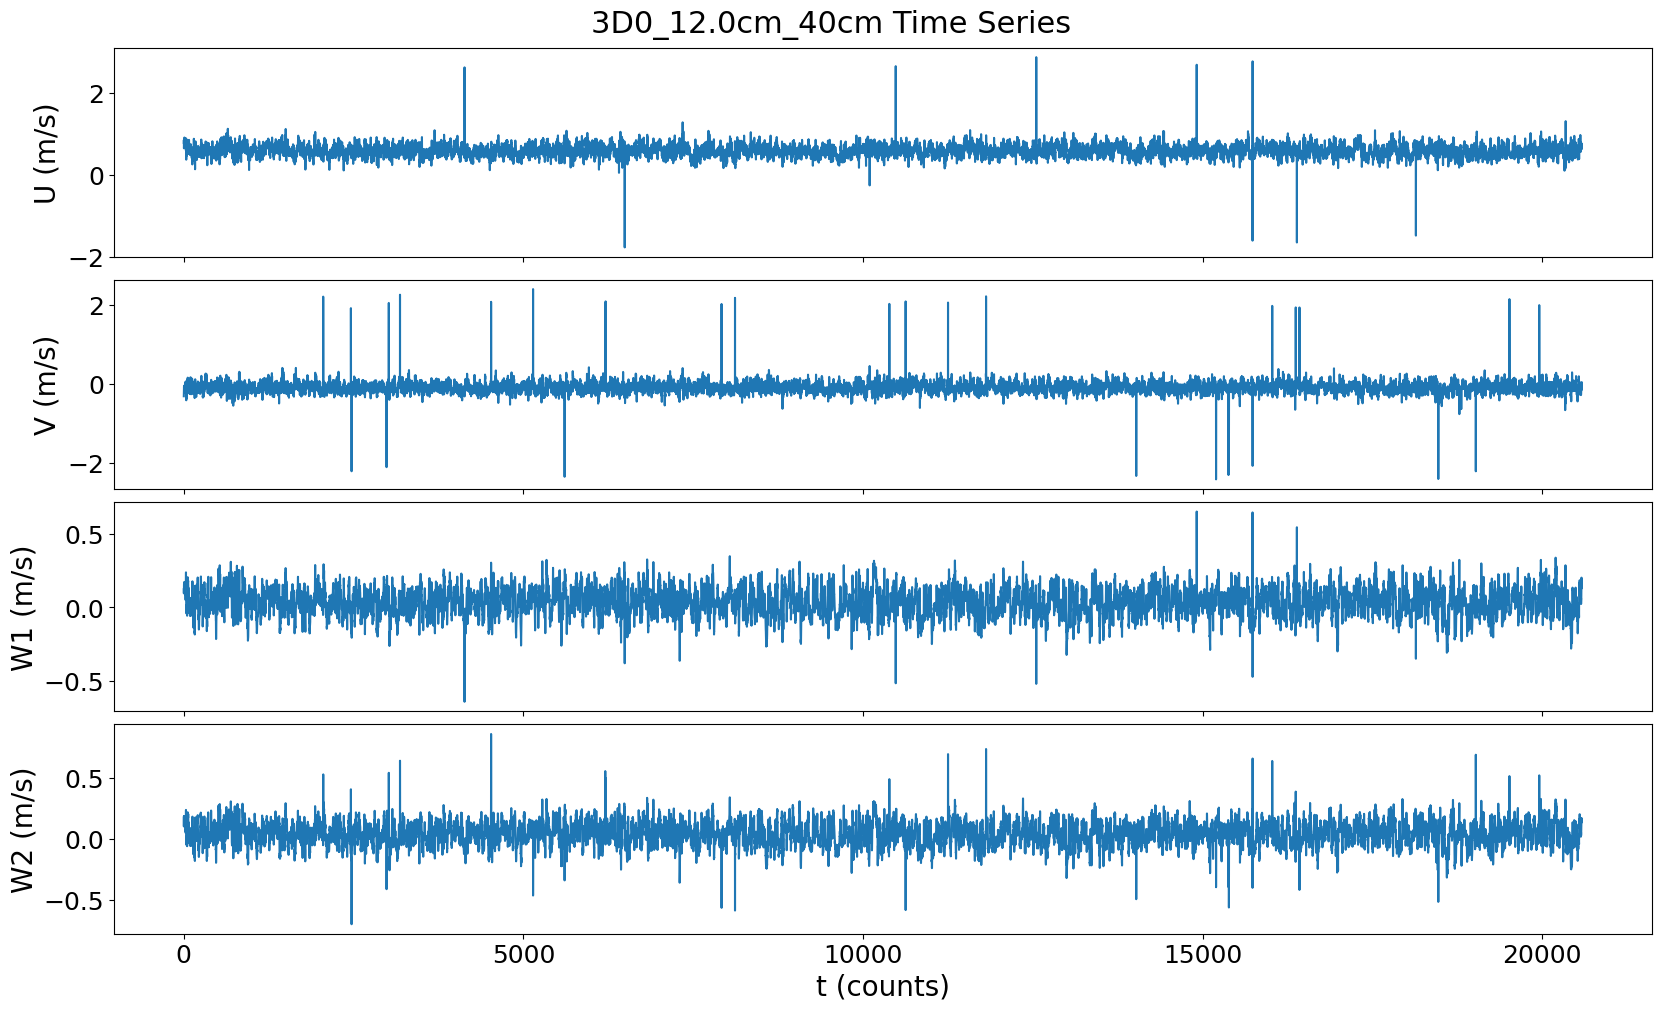

In [24]:
'''Graphing Methods: The ADV_Point_Class_final object has several methods for graphing the data. For example, the following methods can be used:'''

'''This method graphs the time series of the u, v, and w velocities. Attributes can be 'Vel', 'Amp', 'Snr', or 'Cor'. The default is 'Vel'. '''
point.graphTimeSeries(attributes=['Vel'], save=False, save_path='', fontsize=20, linewidth=1.5, figsize=(16.5, 10.0)) 

'''This method graphs the spectra of the u, v, and w velocities'''
#point.graphFreqSpec(divNperseg = 0.1, figsize=(16.5, 10.0), fontsize=20, linewidth=1.5) 

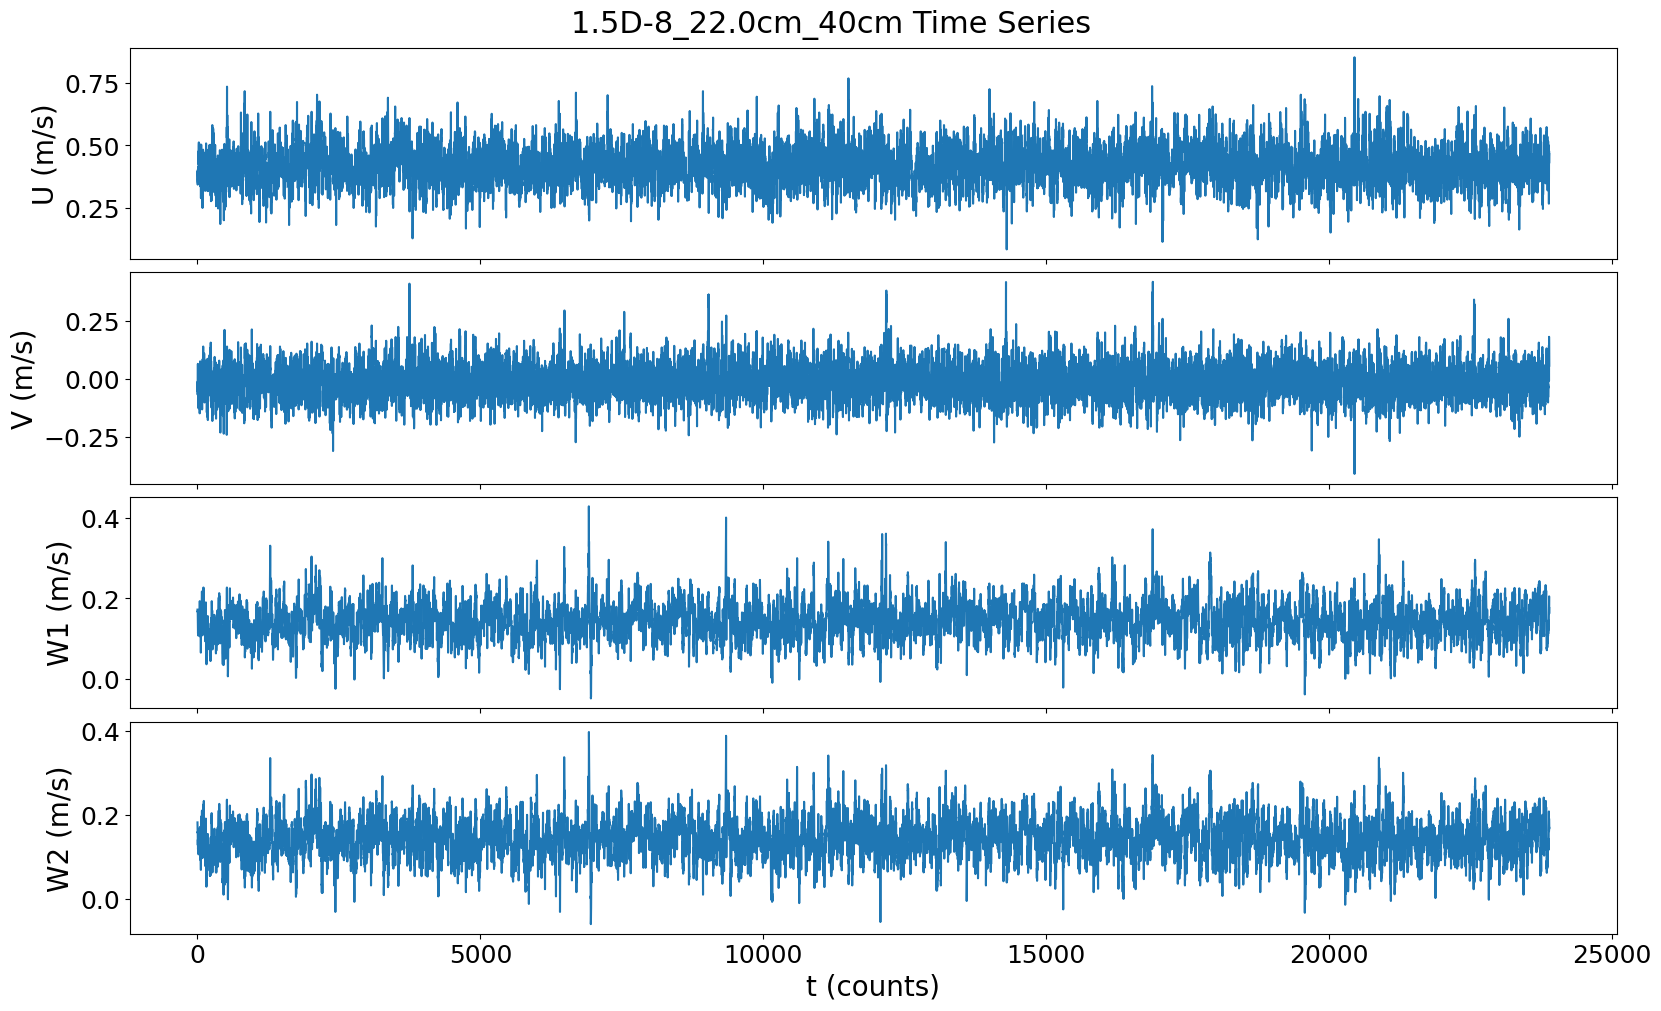

In [5]:
''' Data Cleaning/Despking Methods: The ADV_Point_Class_final object has several methods for cleaning the data. For example, the following methods can be used:'''
point.mPST(maxNumIterations=20)

'''Now if we graph the time series of the u, v, and w velocities again, we can see that the spikes have been removed'''
point.graphTimeSeries(attributes=['Vel'], save=False, save_path='', fontsize=20, linewidth=1.5, figsize=(16.5, 10.0)) 

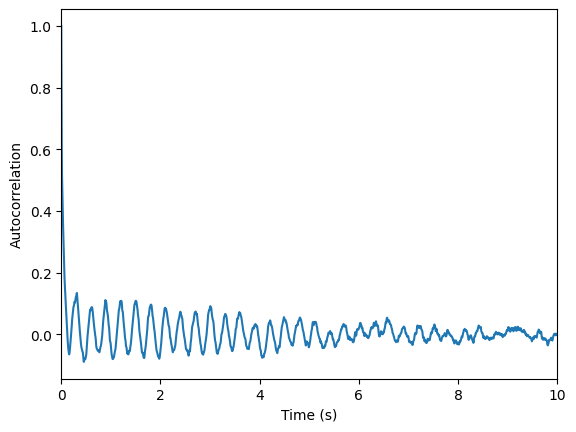

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# divide x axis by the sampling frequency to get time in seconds
# divide y axis by the number of points to get the normalized autocorrelation
plt.plot(np.arange(0, len(point.auto_corr[0])/point.freq, 1/point.freq), point.auto_corr[0])
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')
plt.xlim(0, 10)
plt.show()

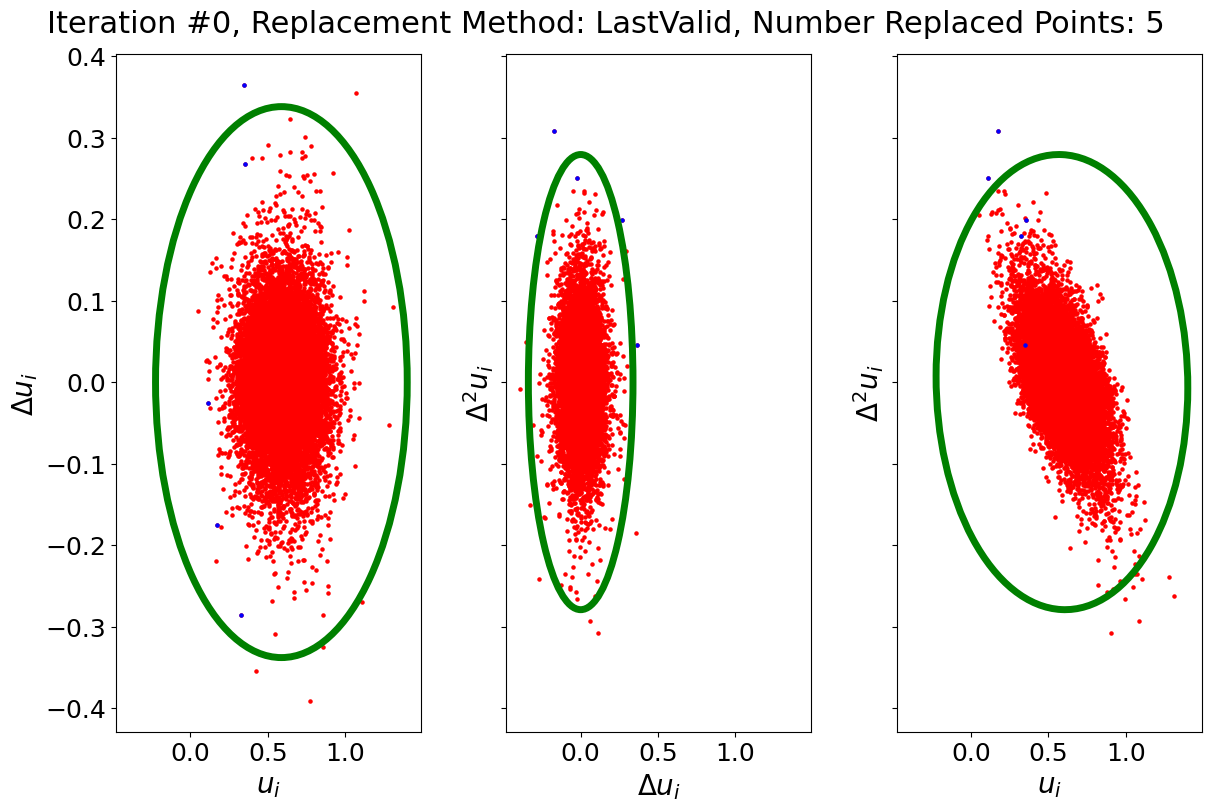

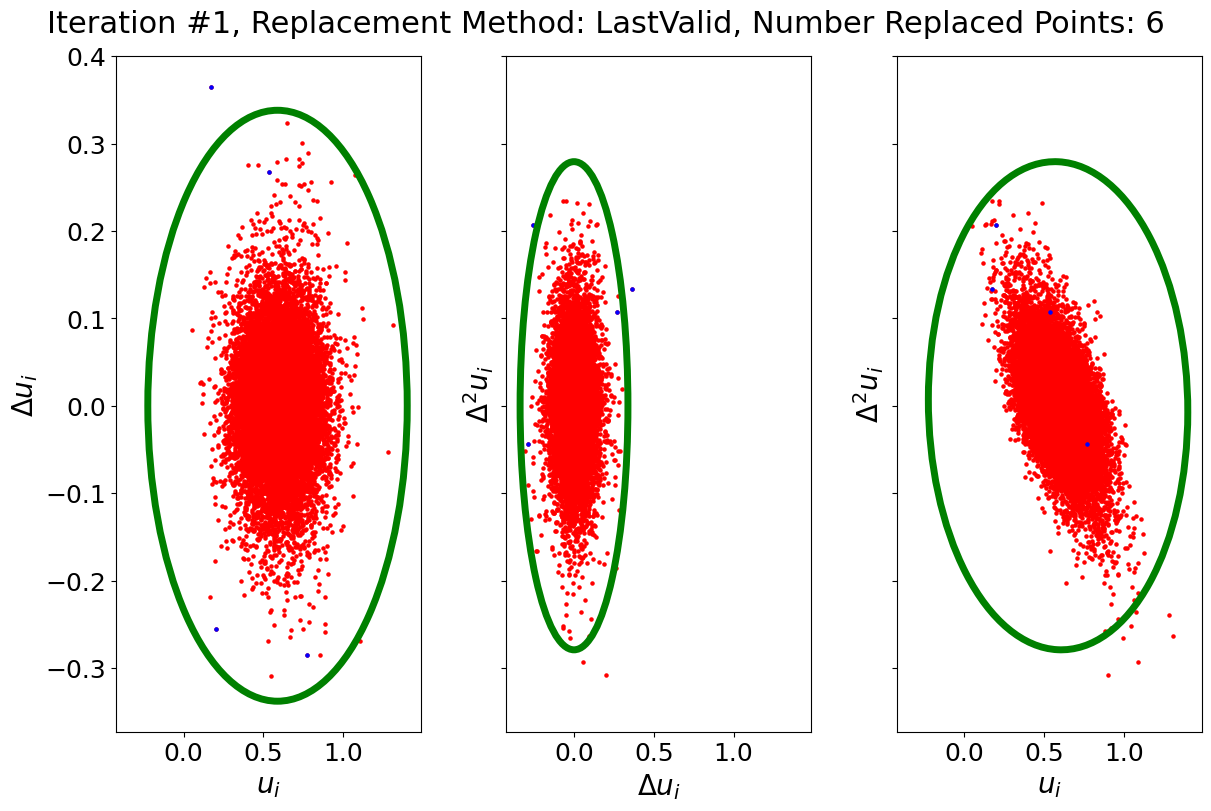

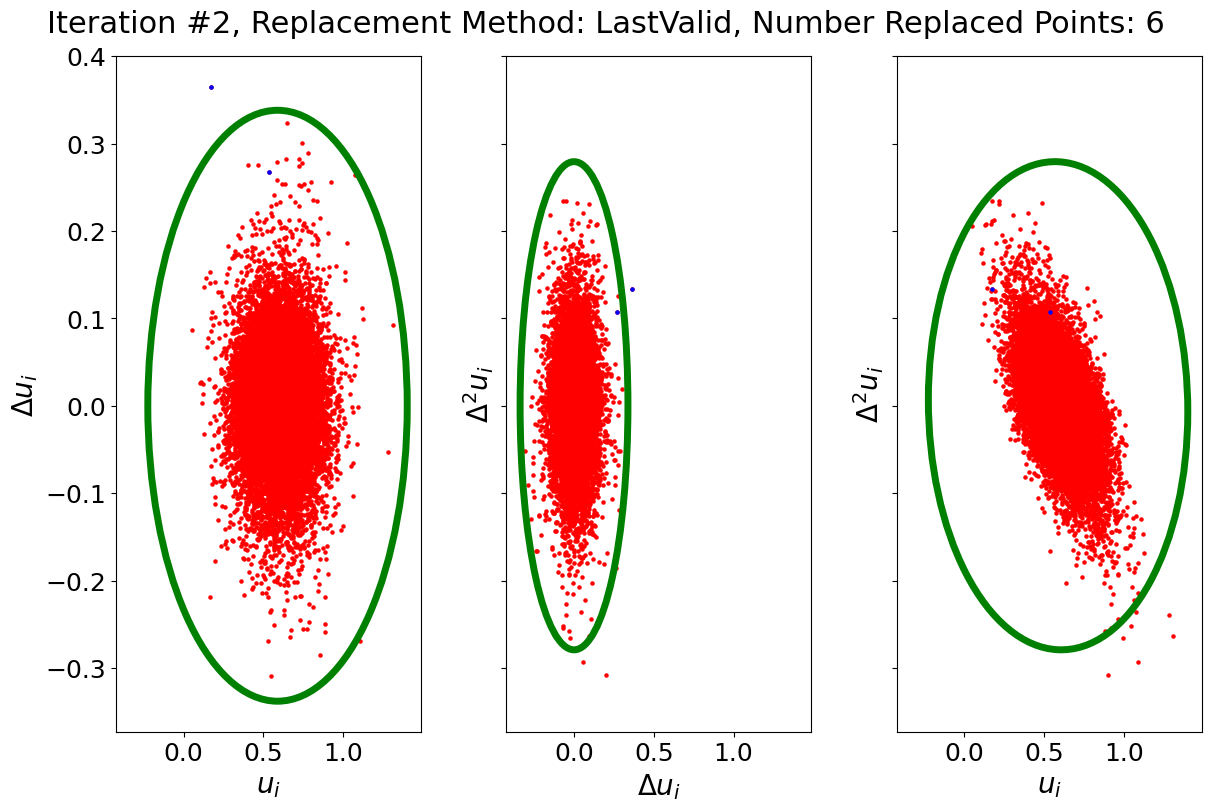

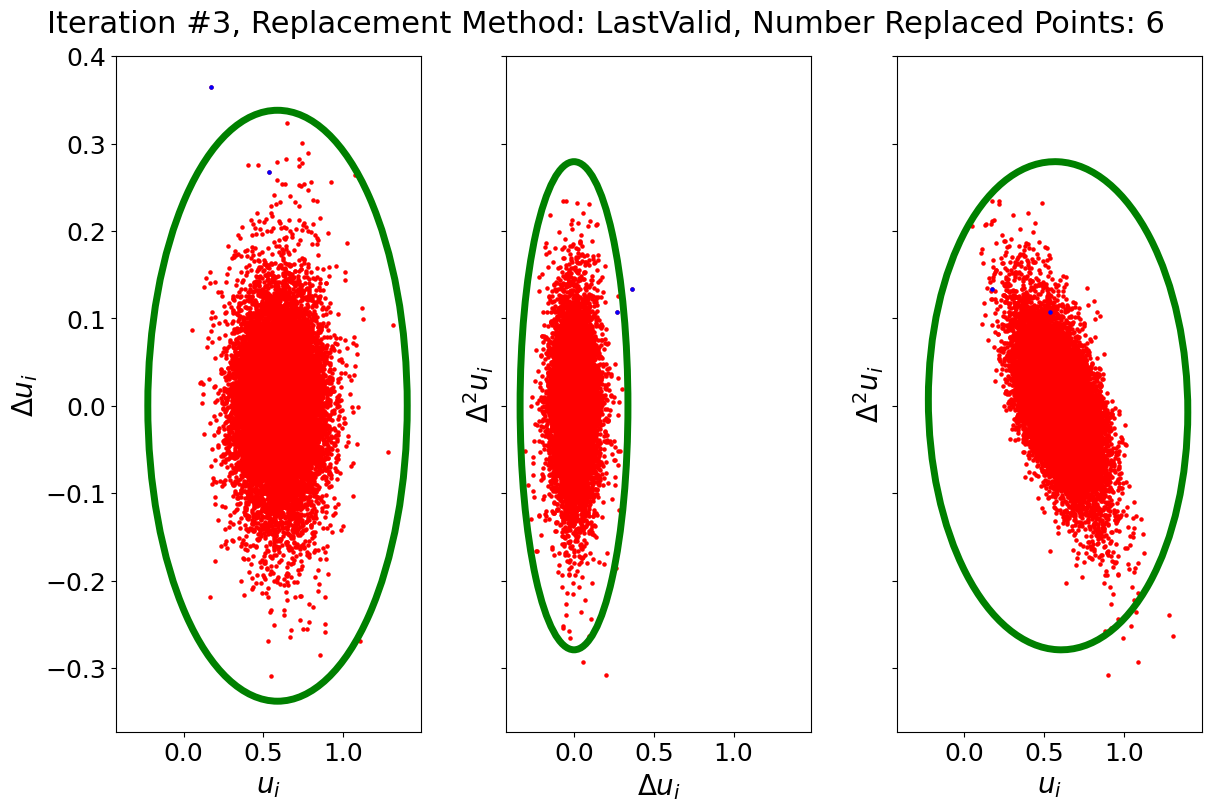

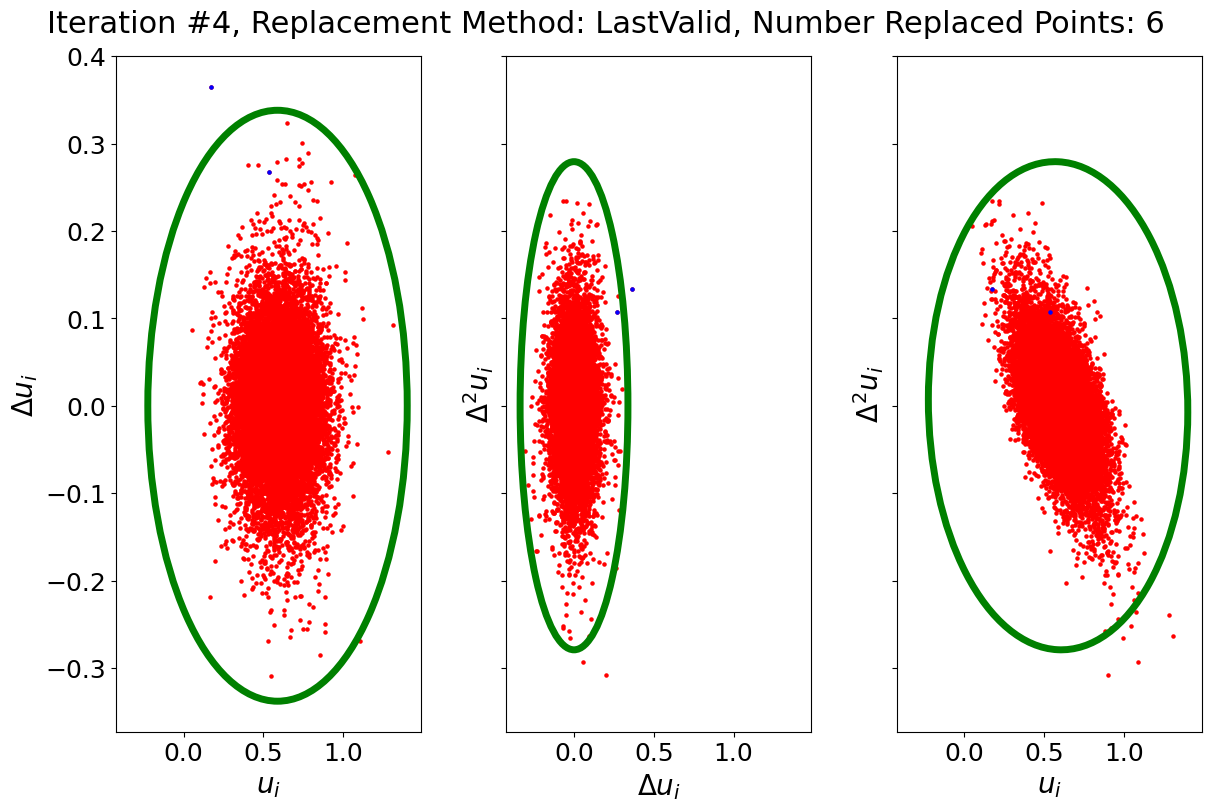

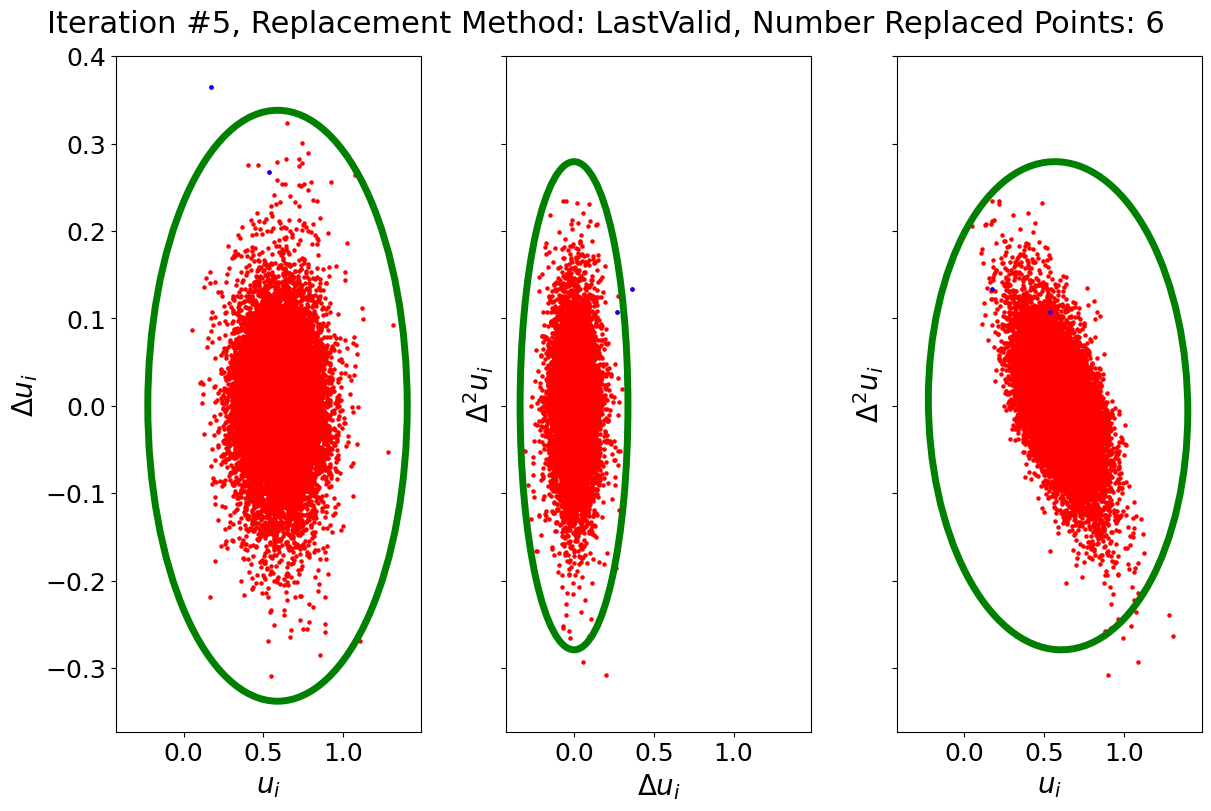

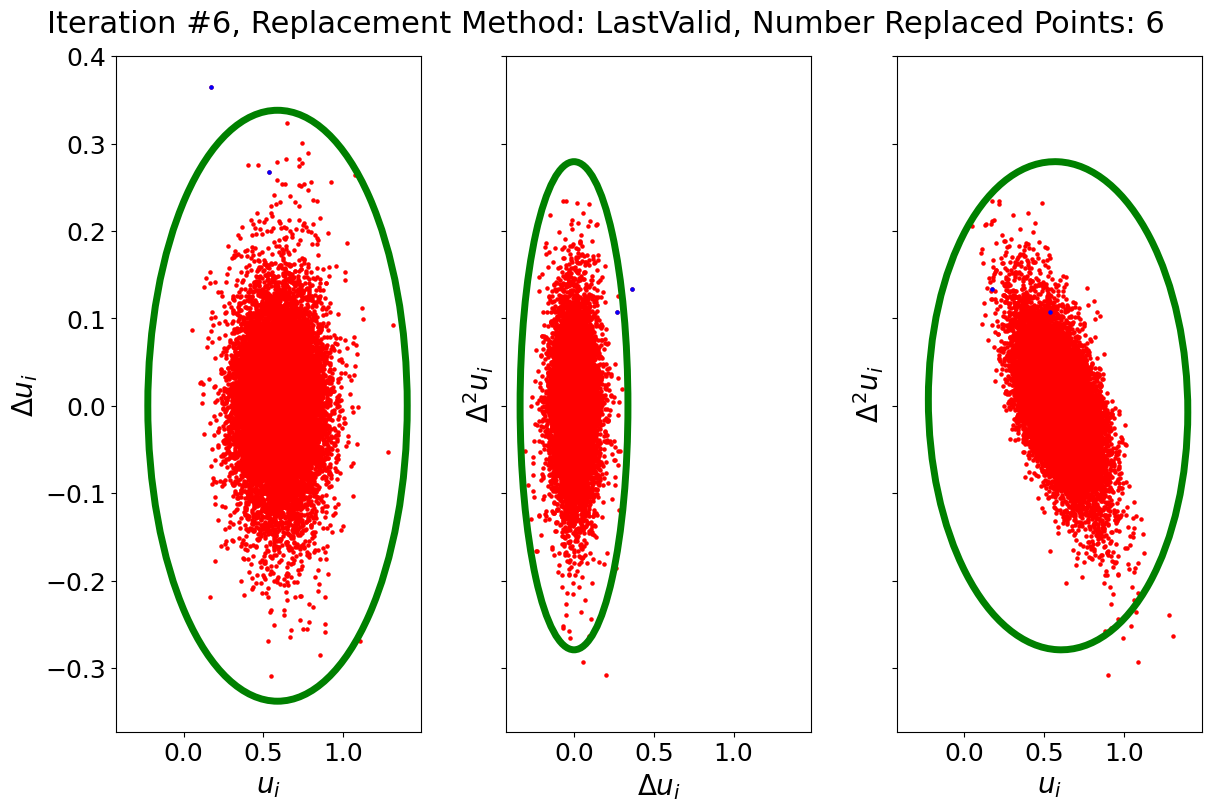

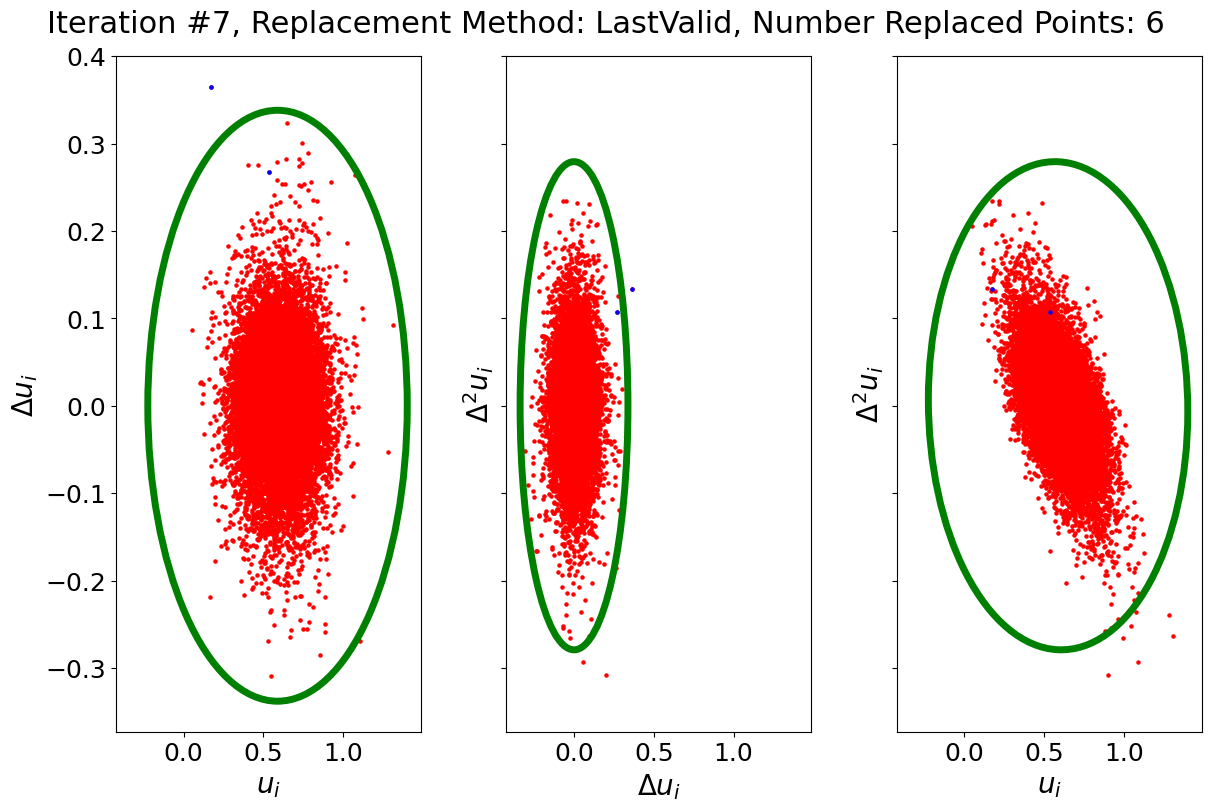

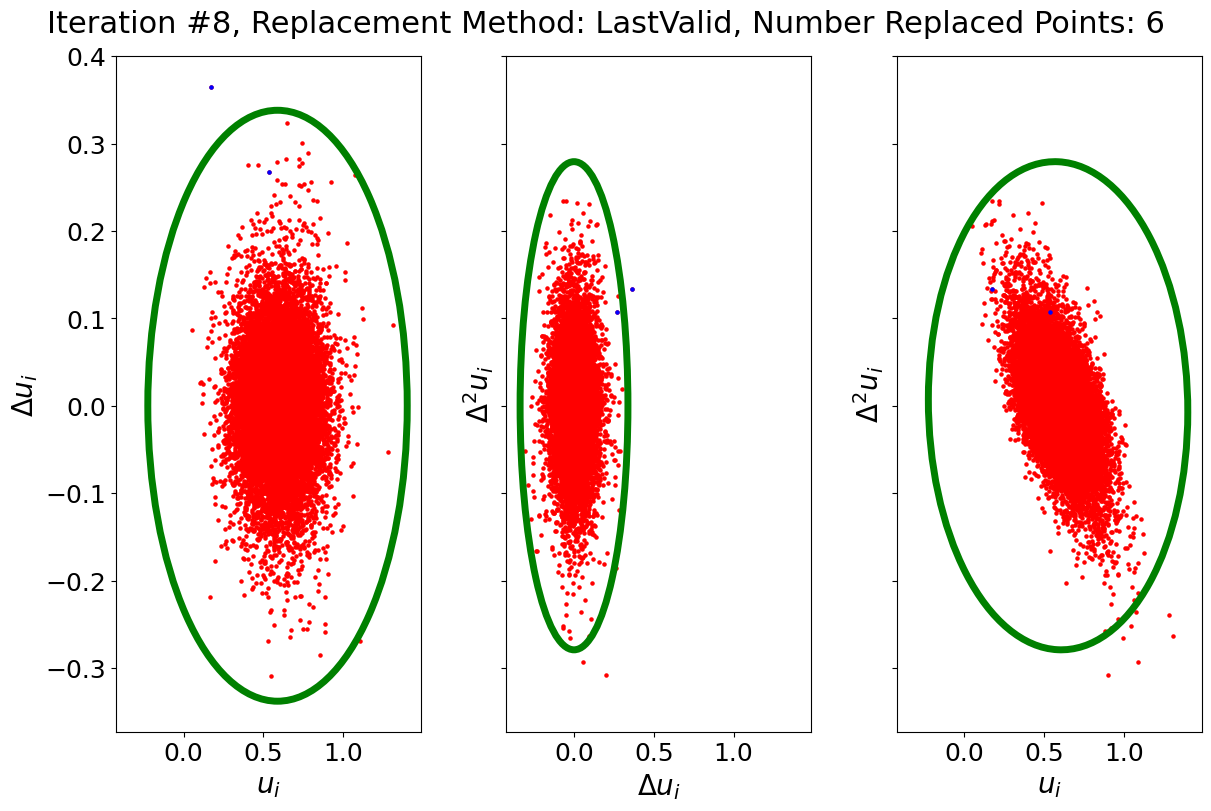

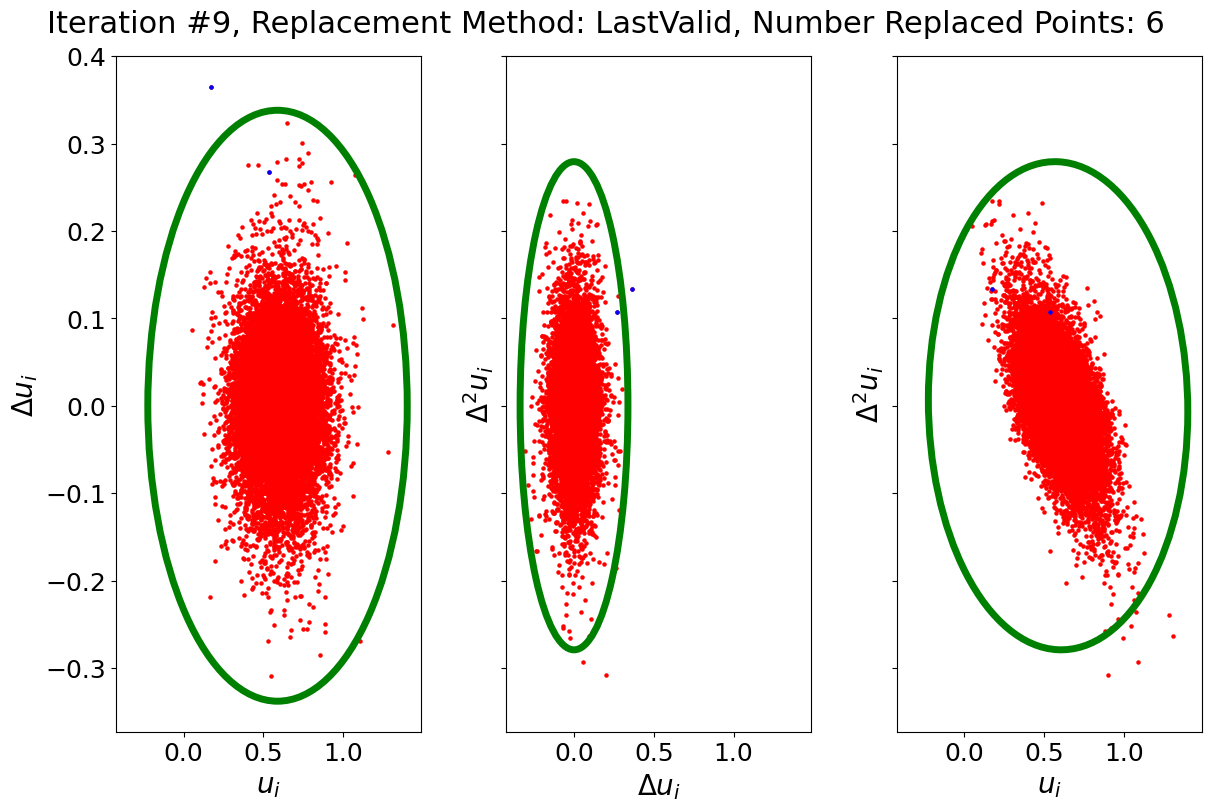

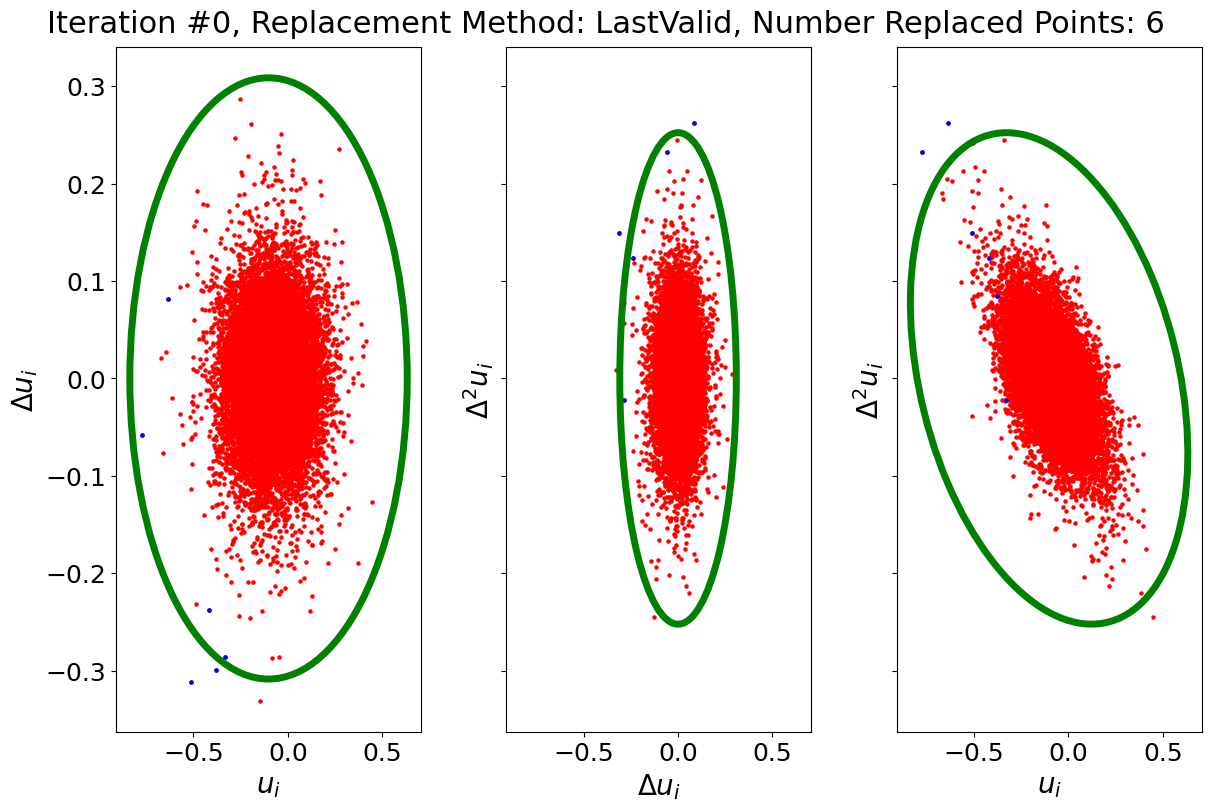

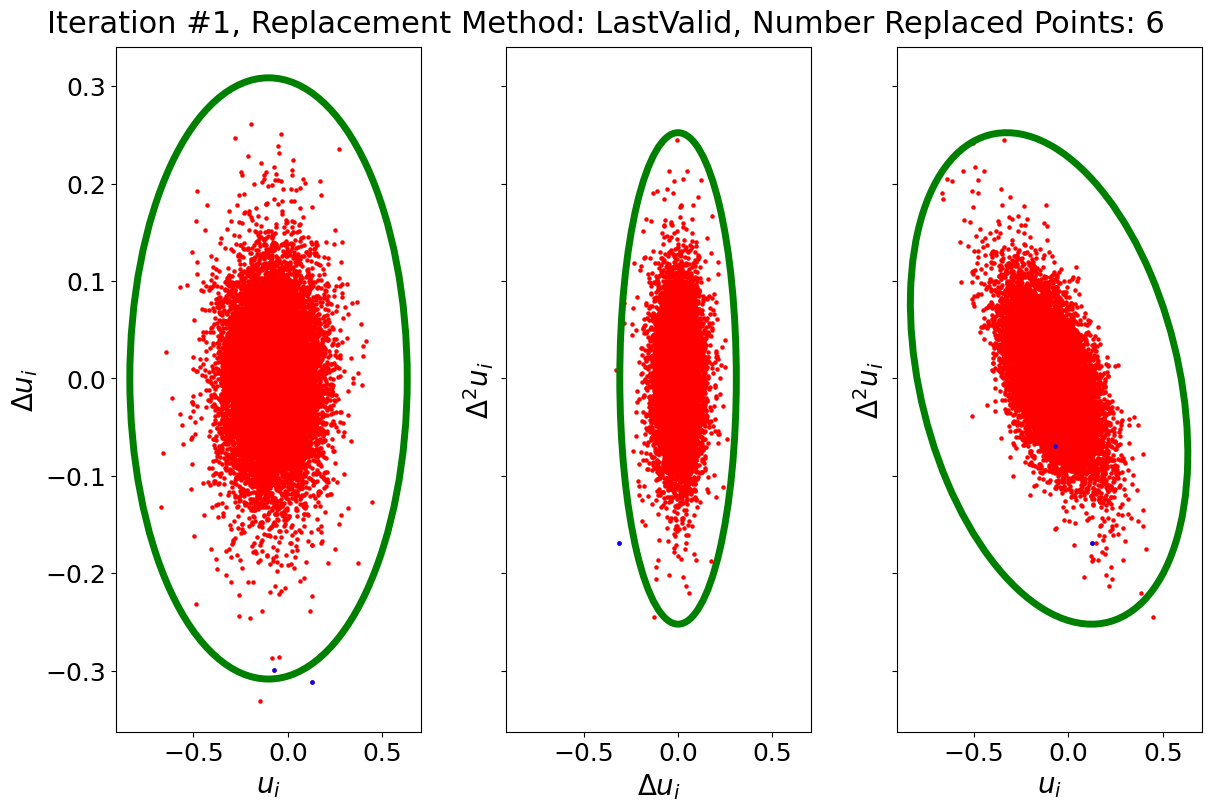

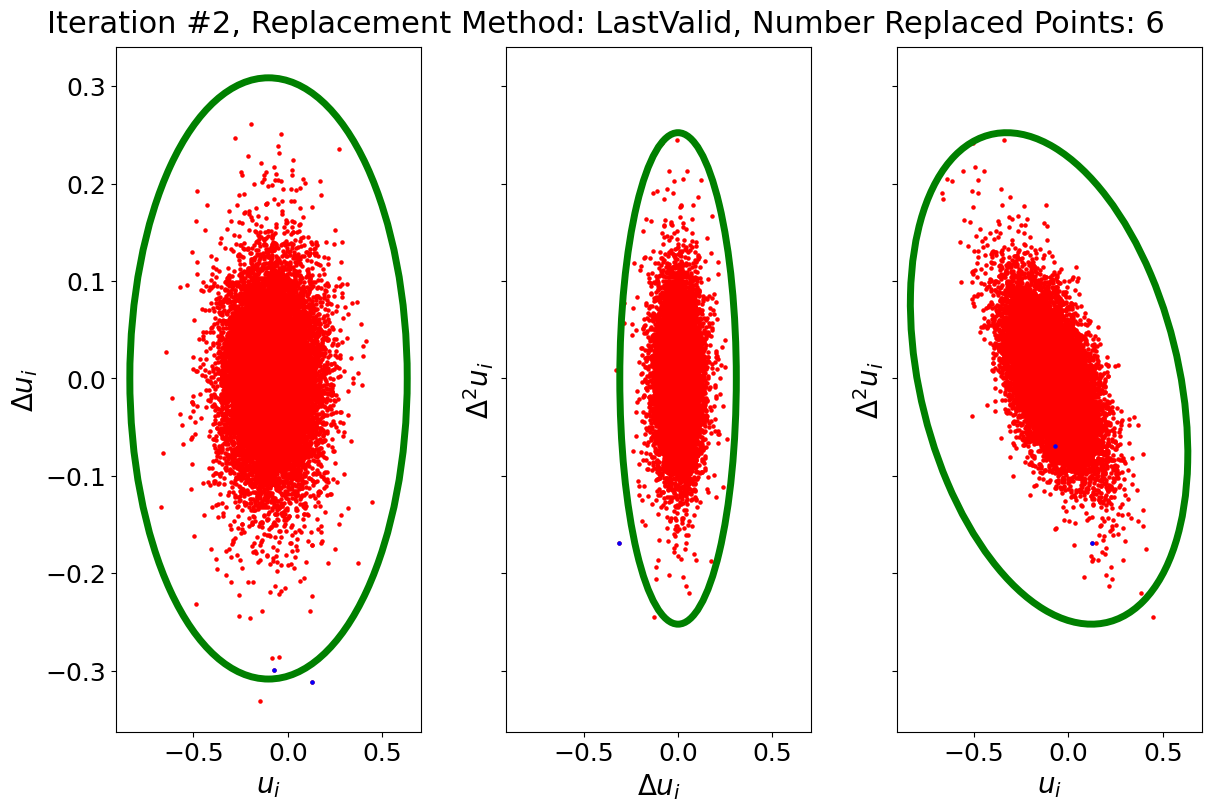

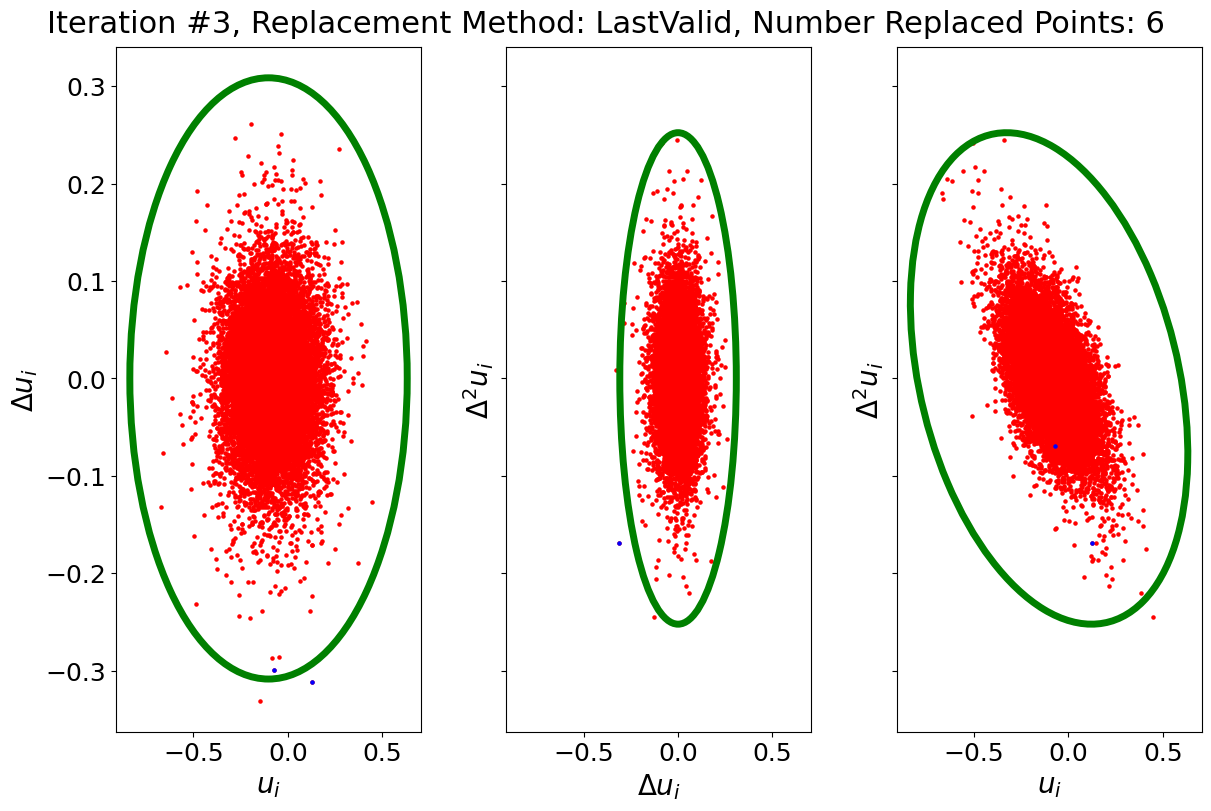

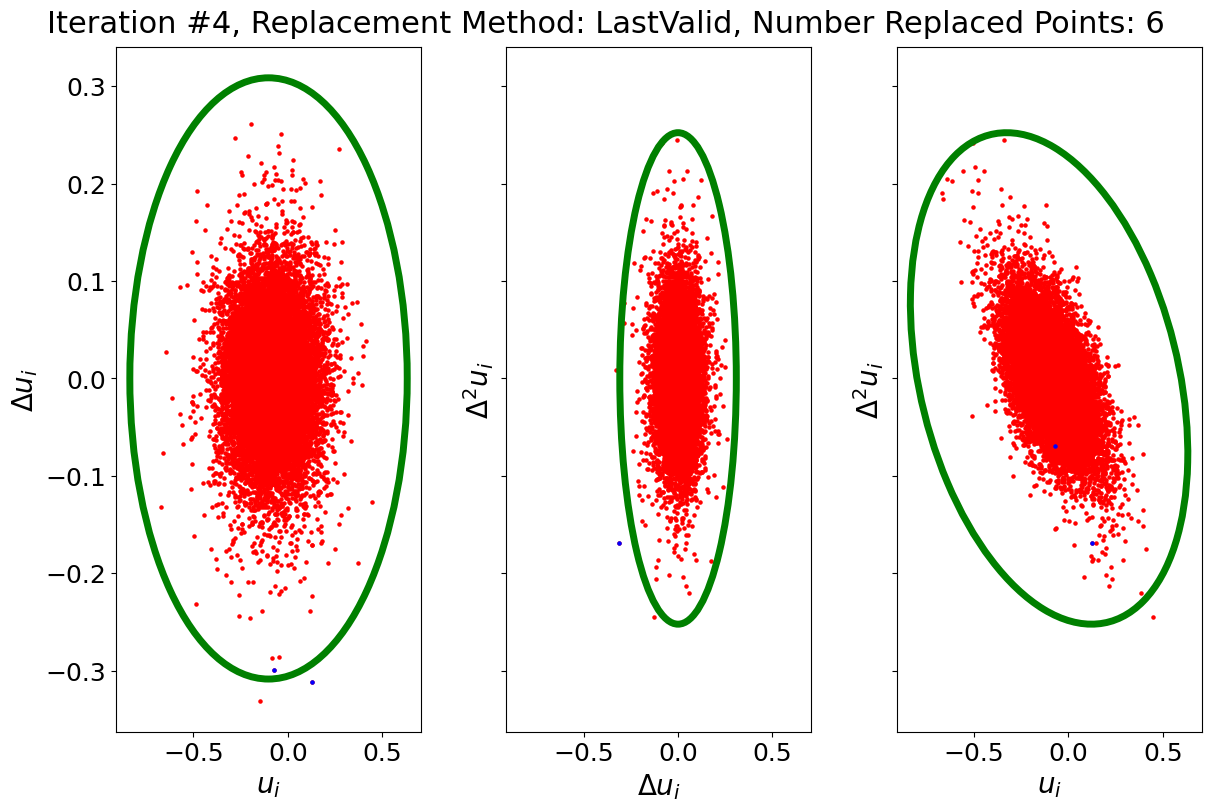

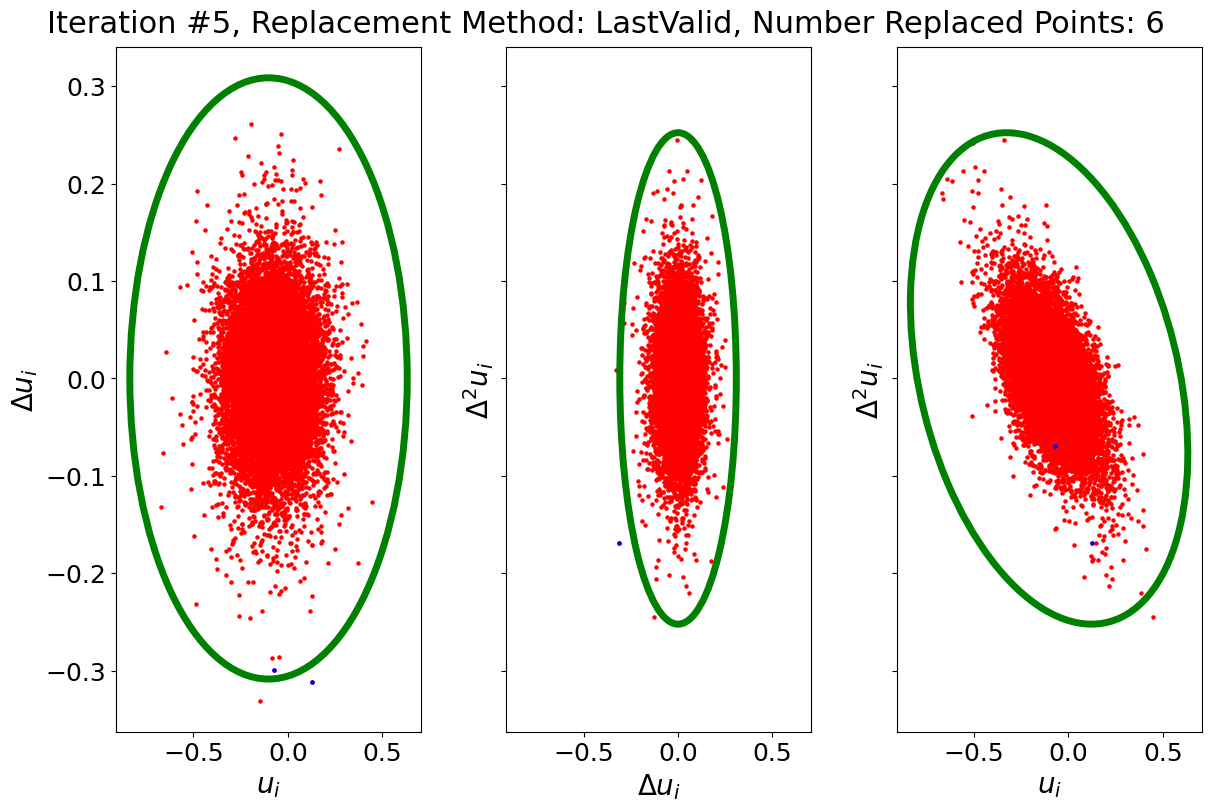

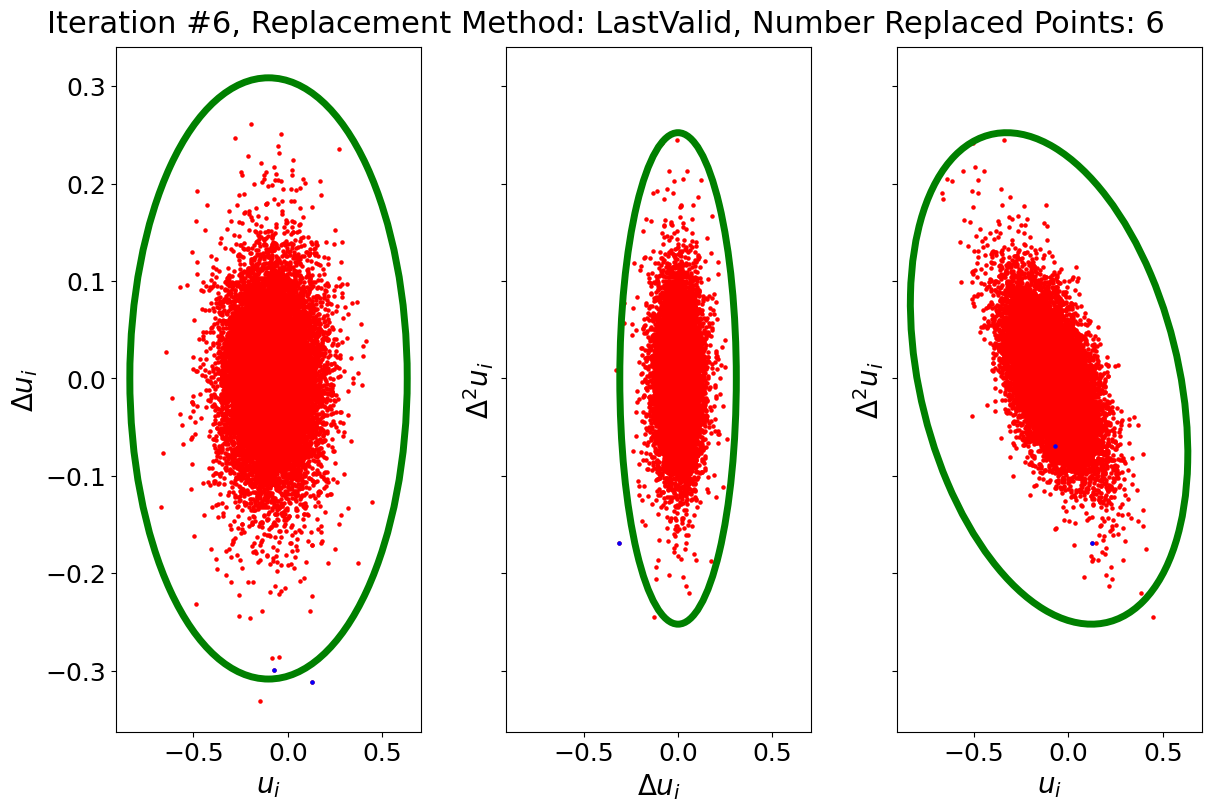

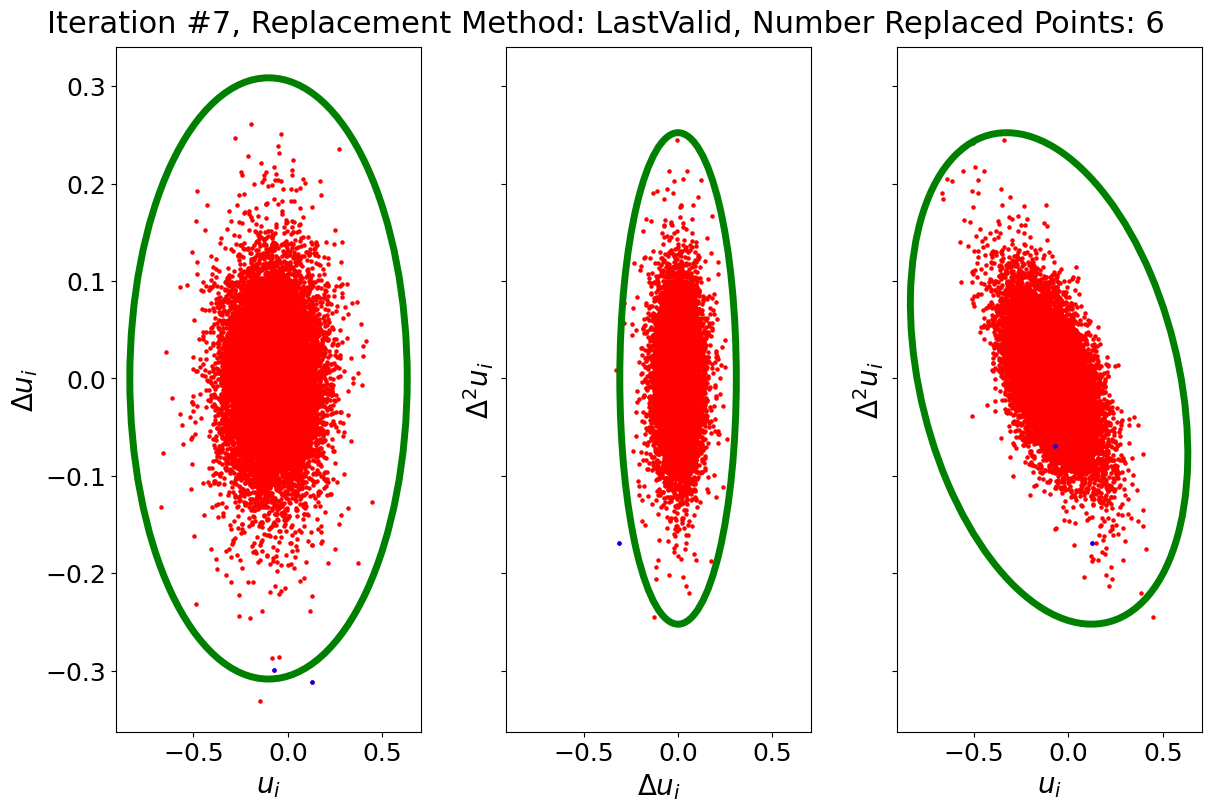

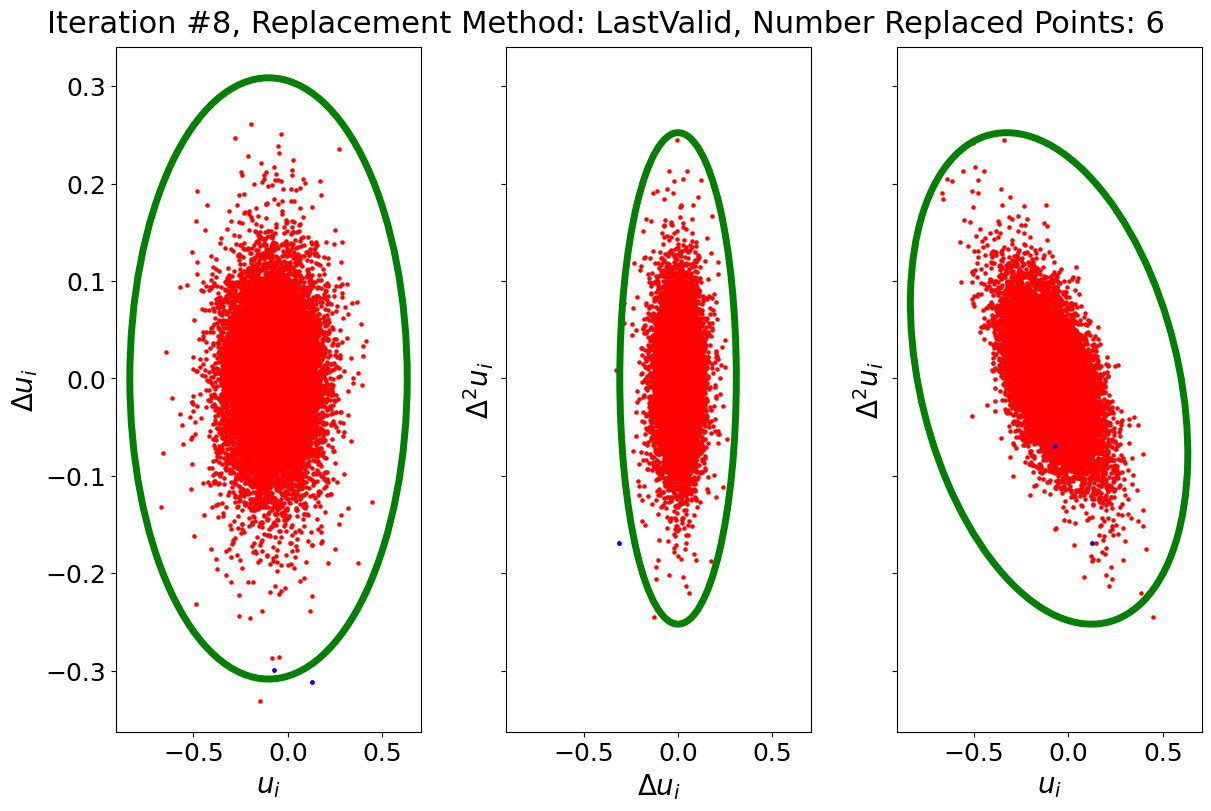

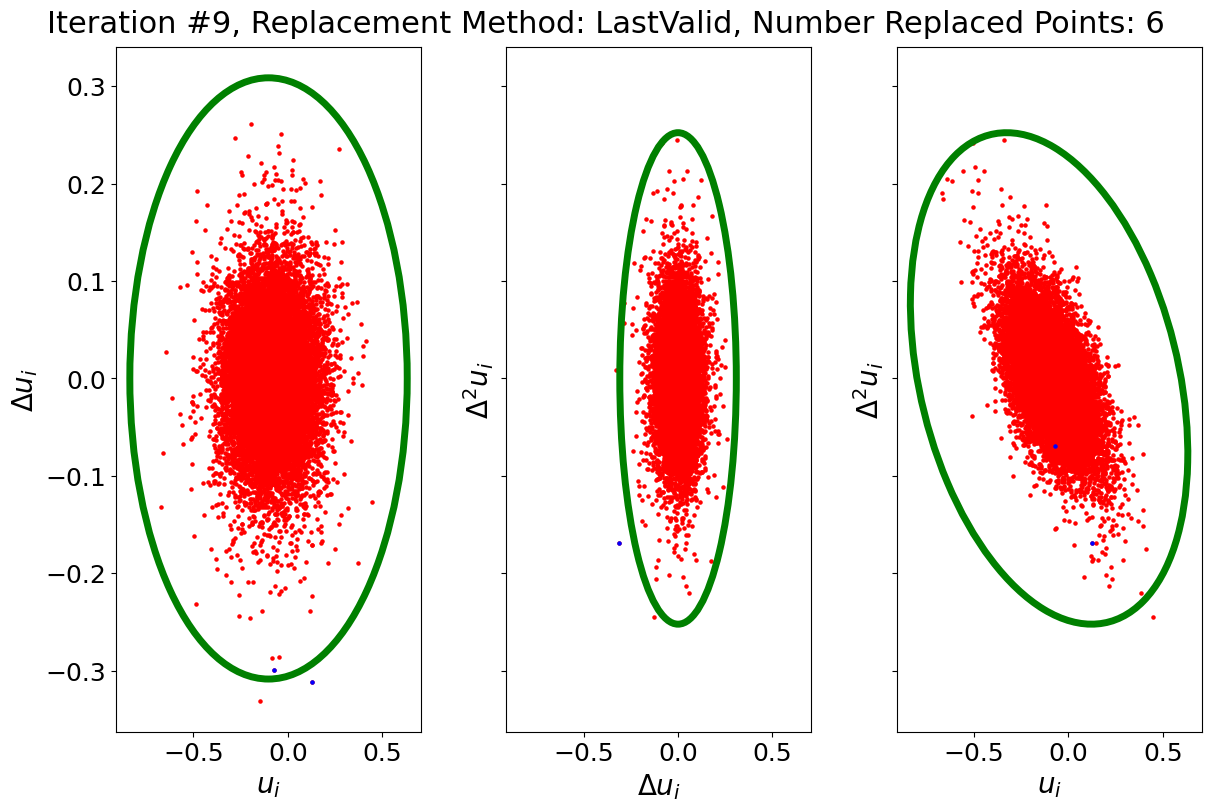

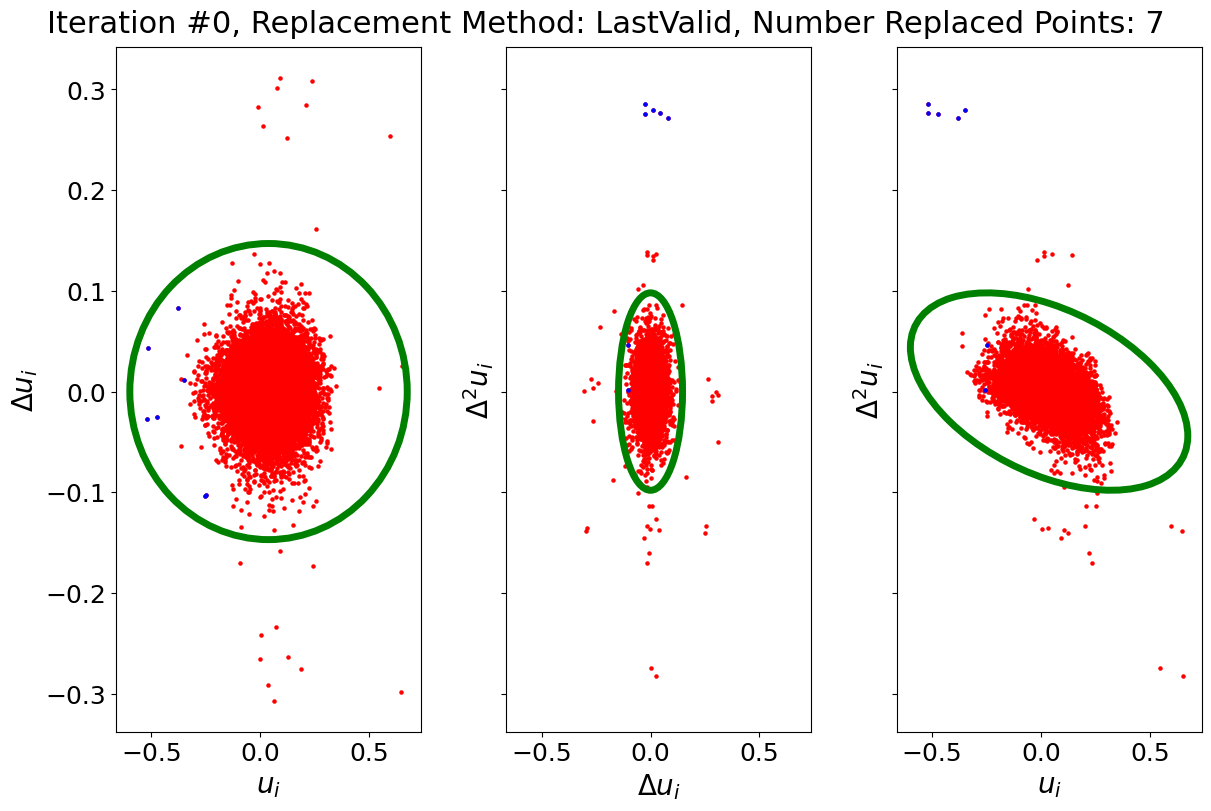

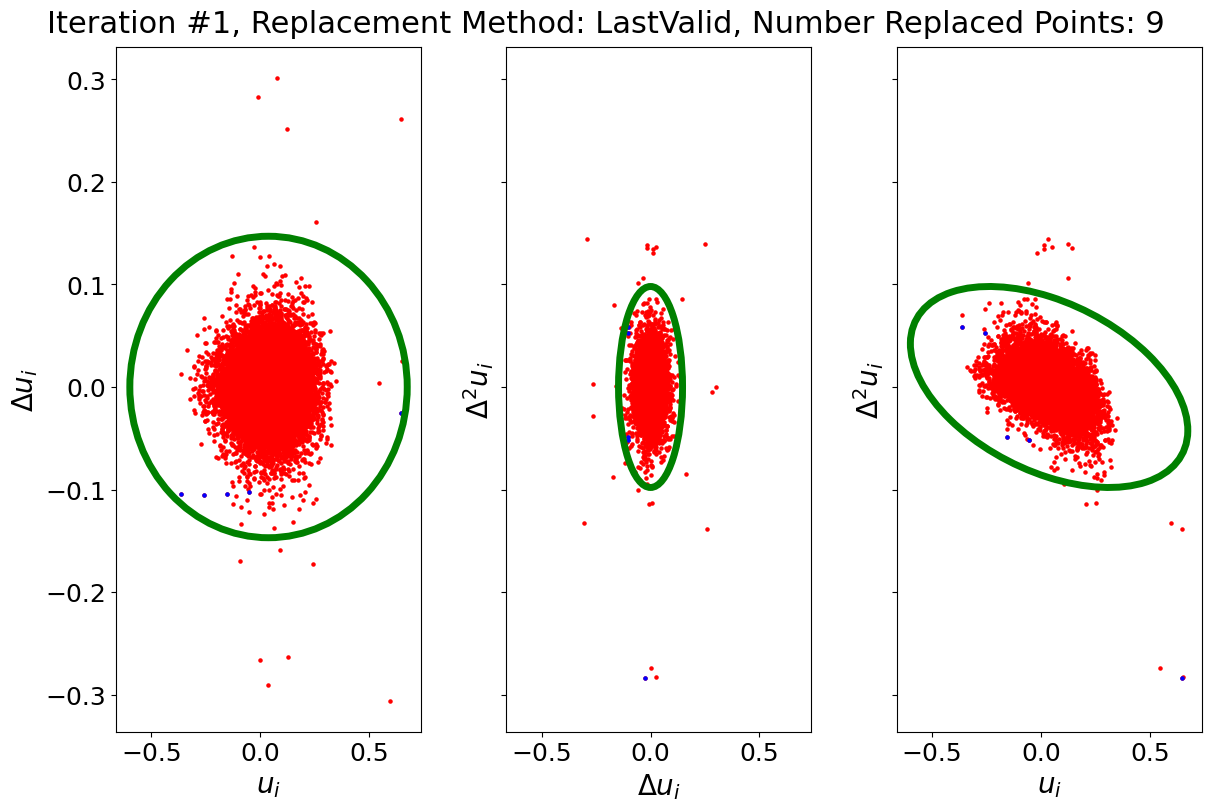

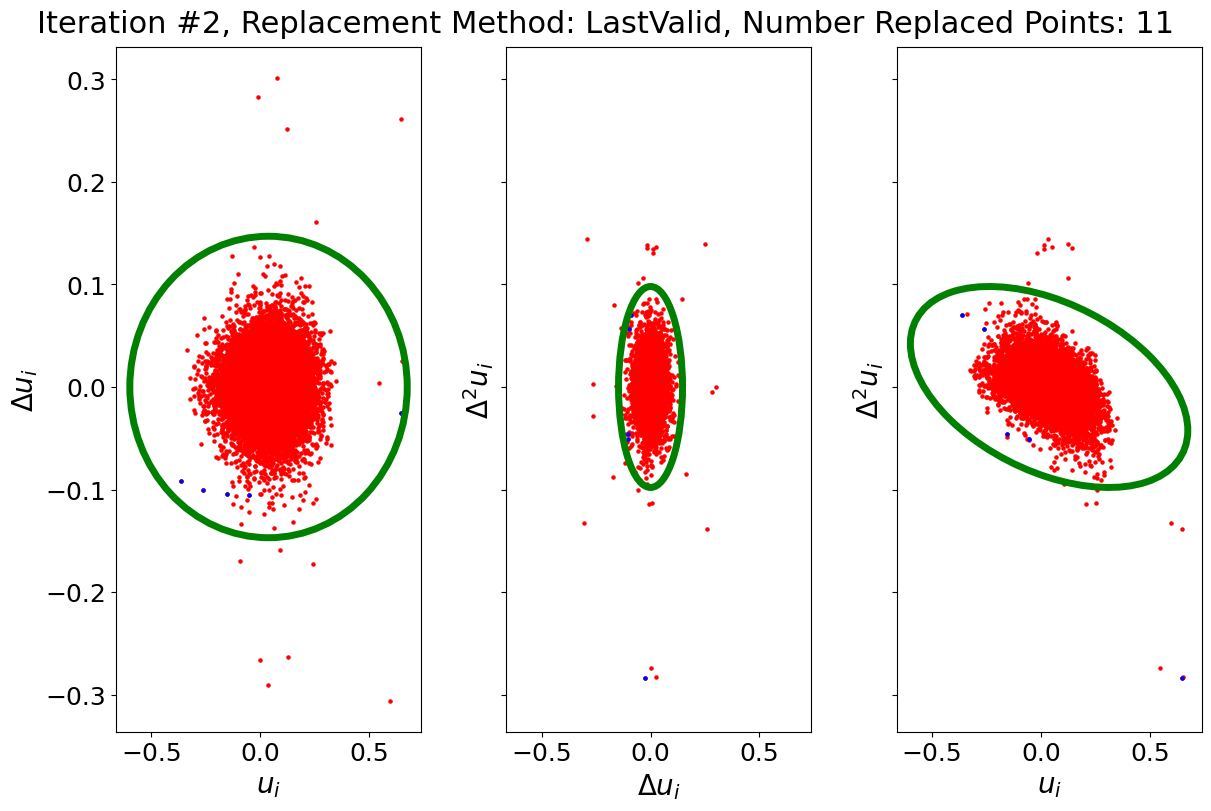

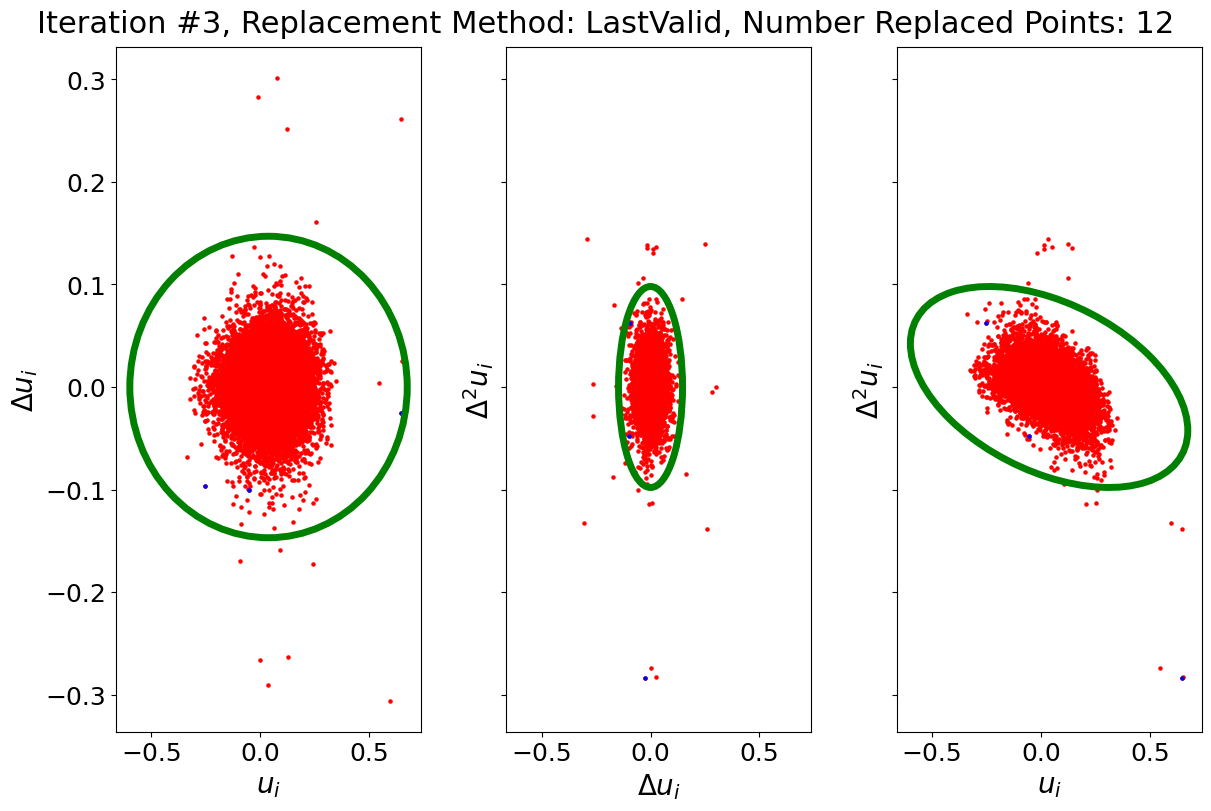

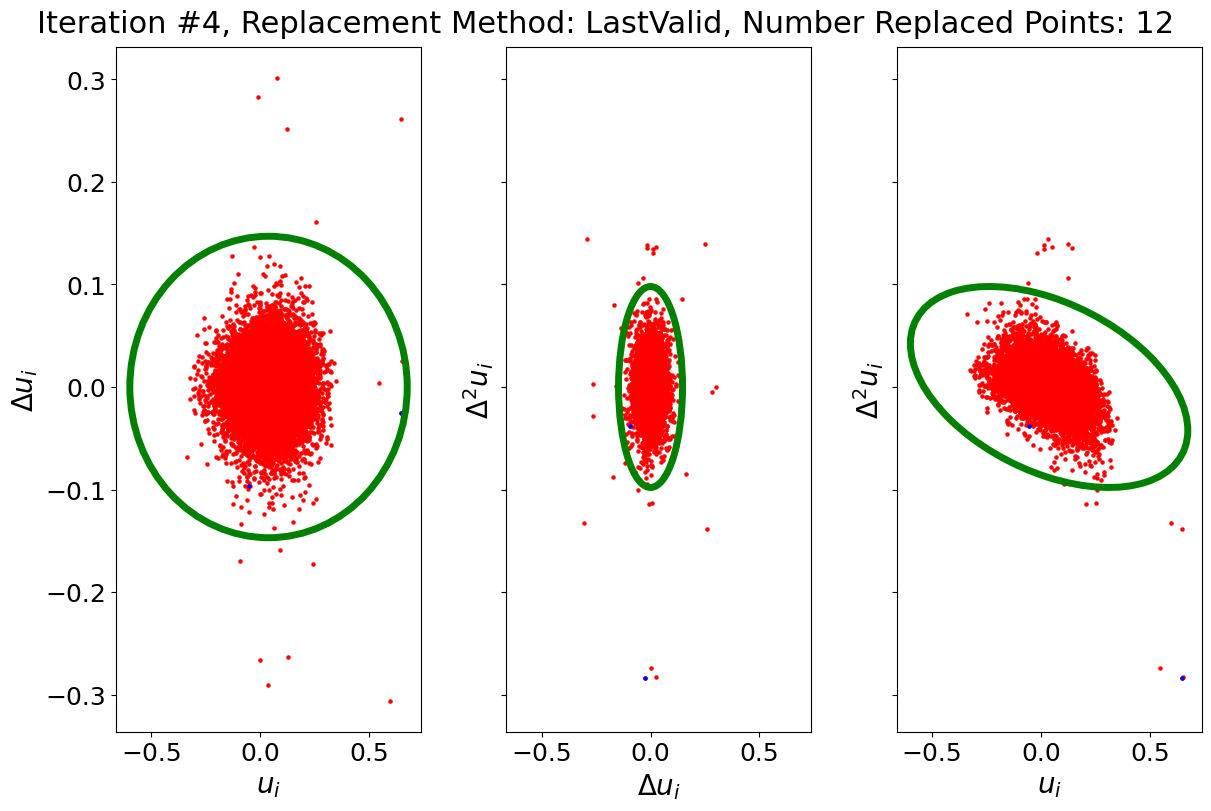

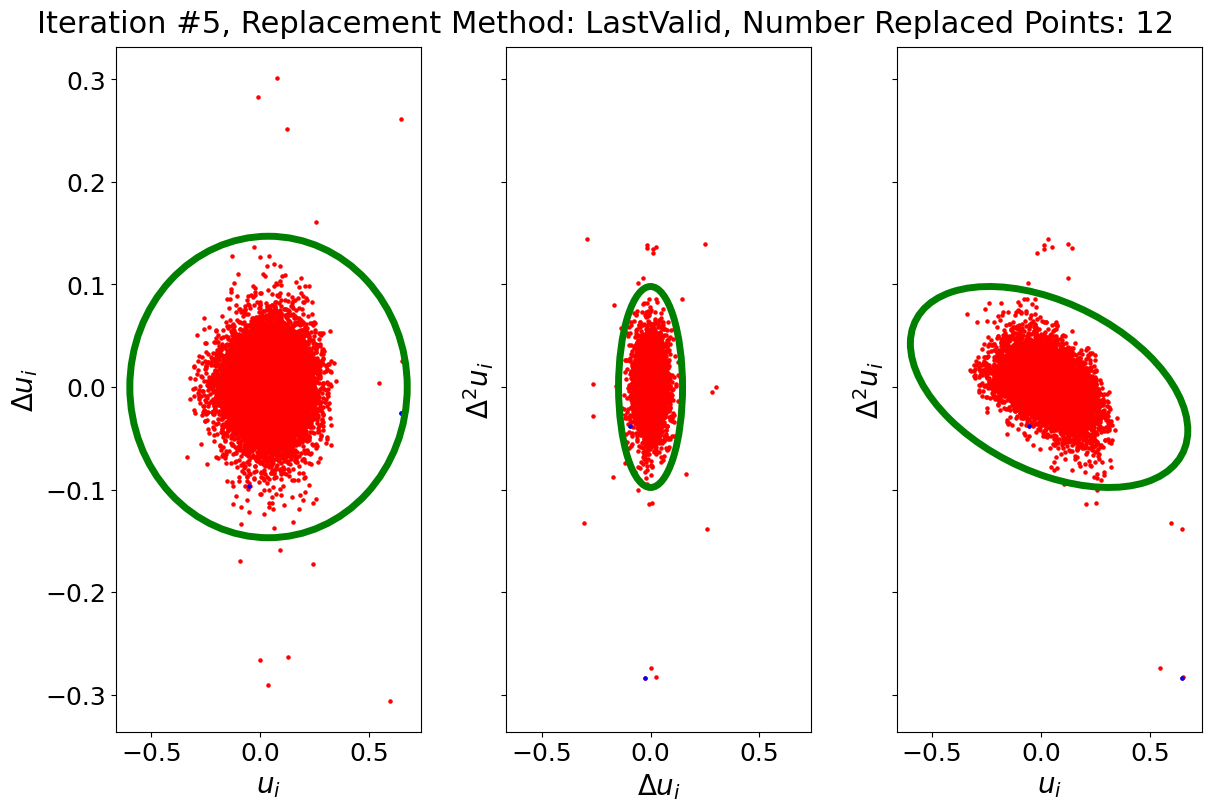

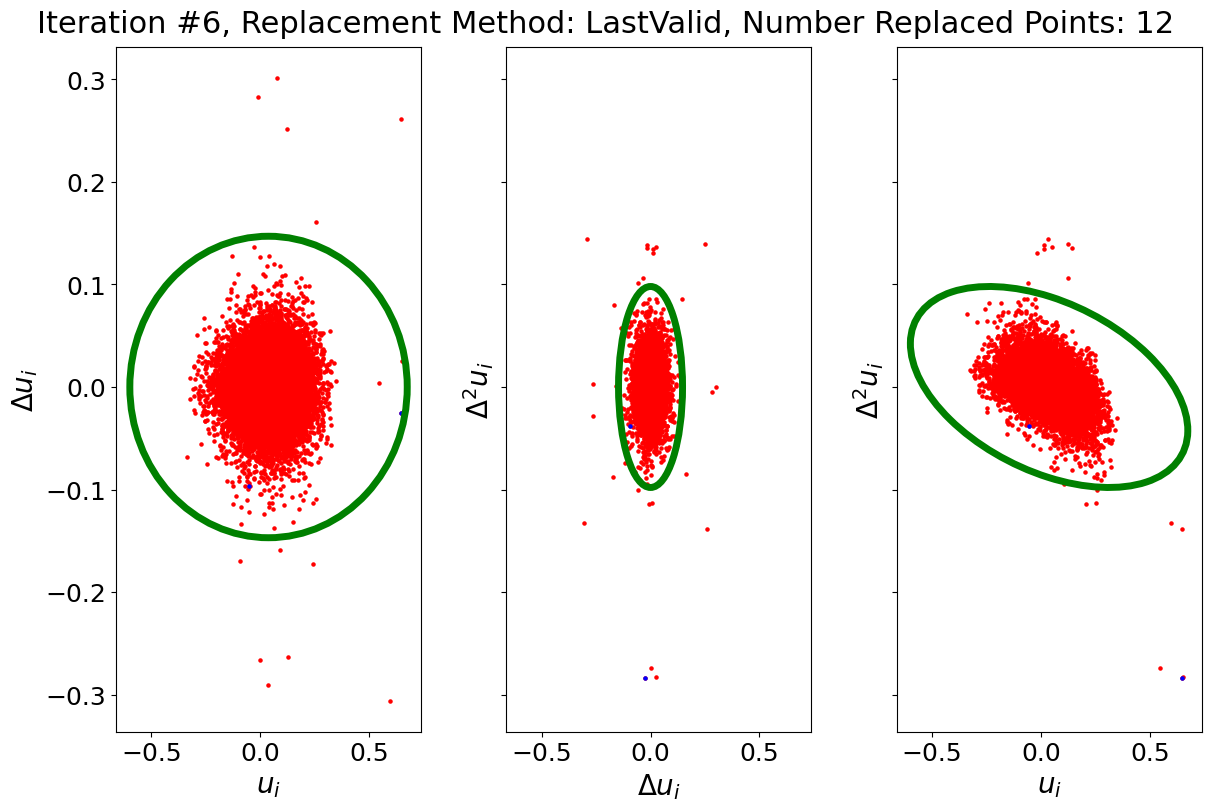

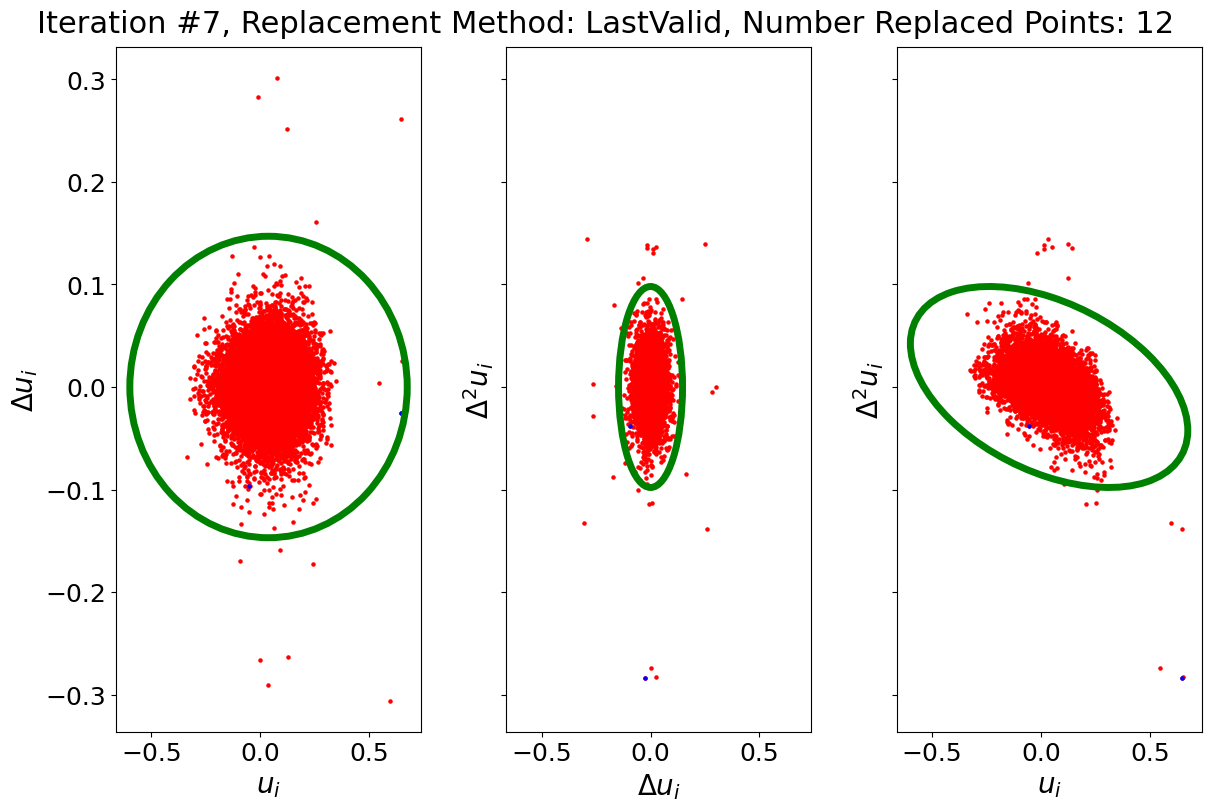

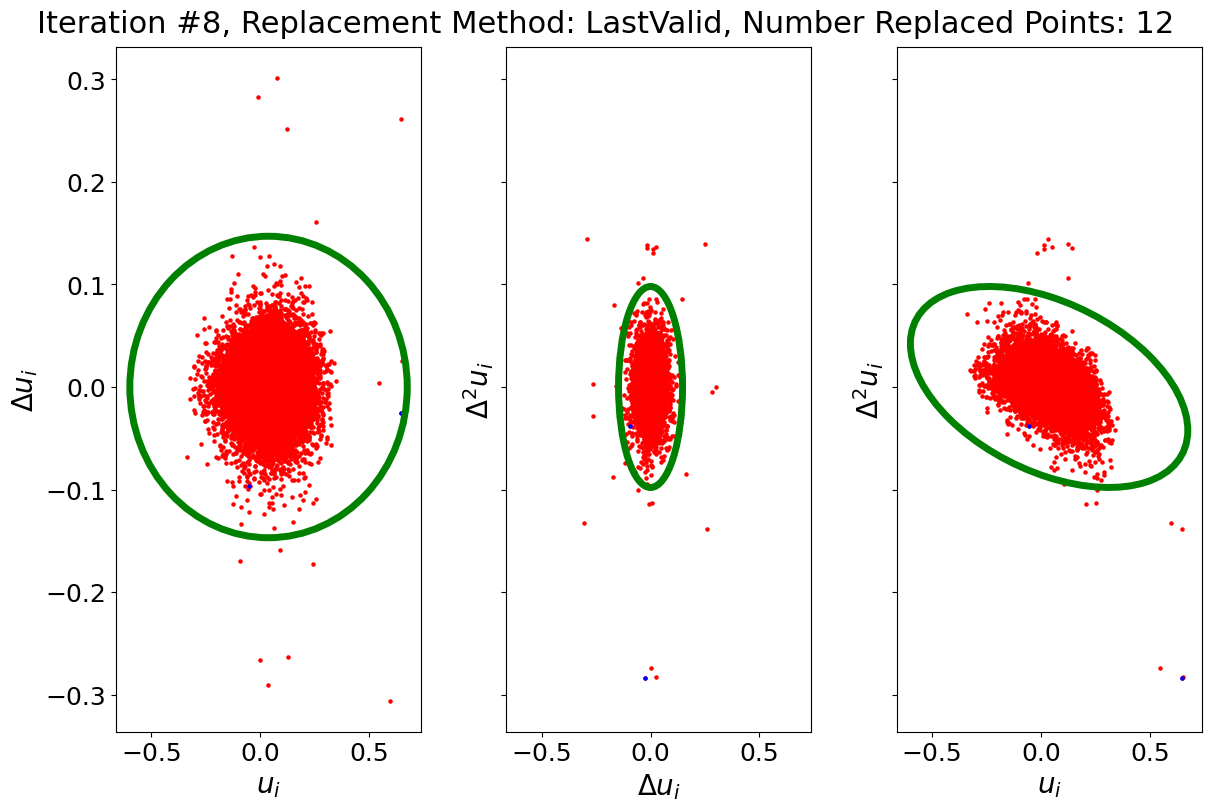

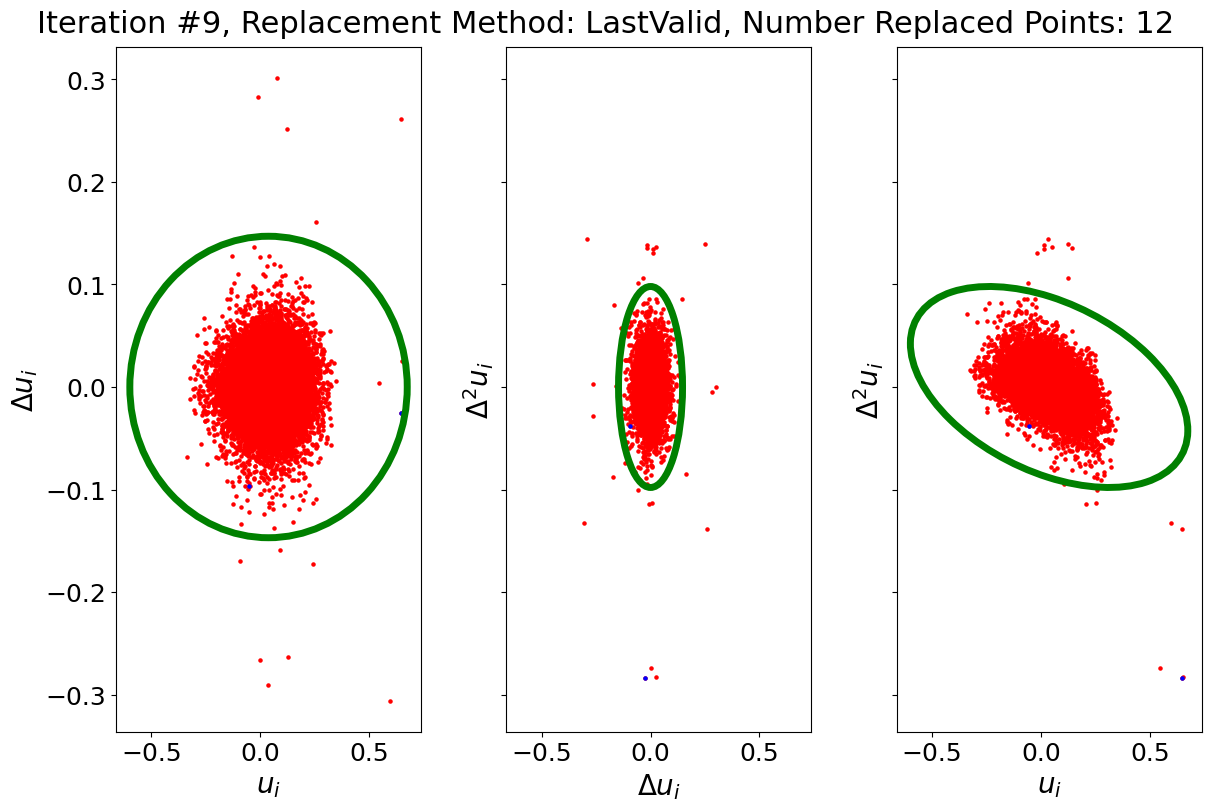

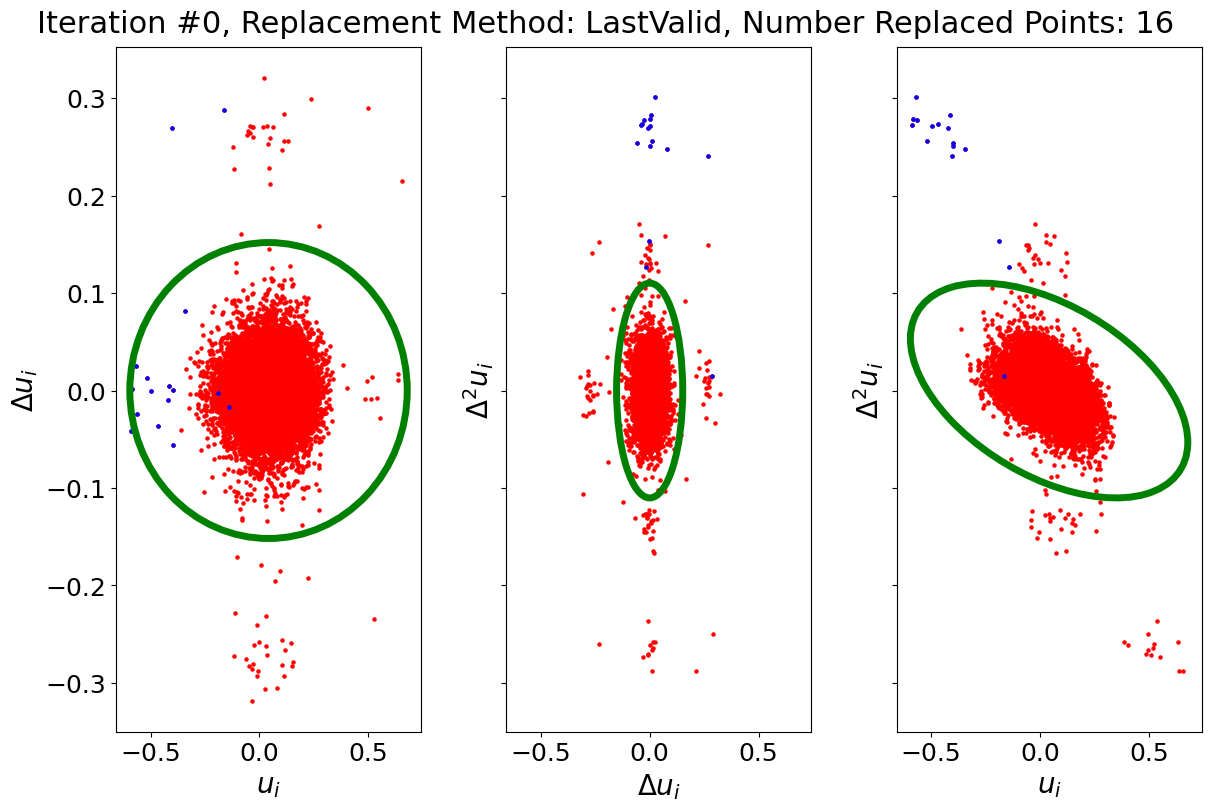

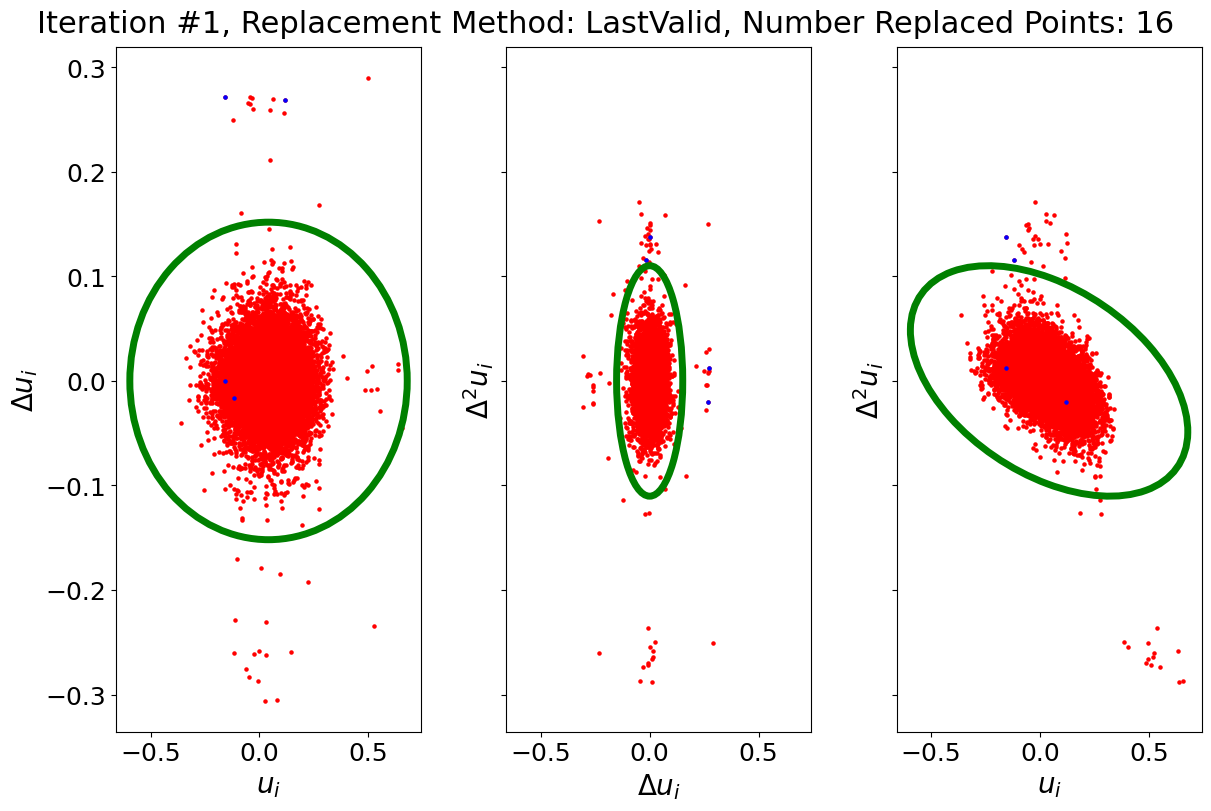

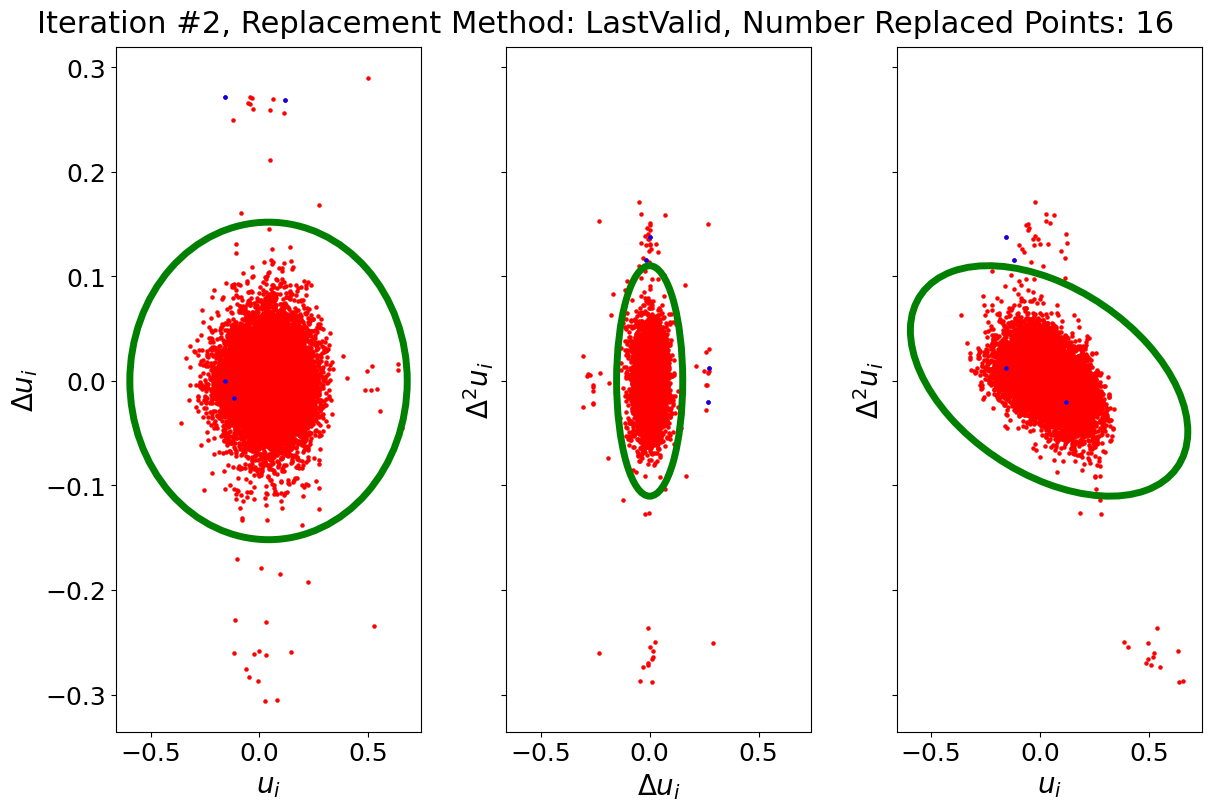

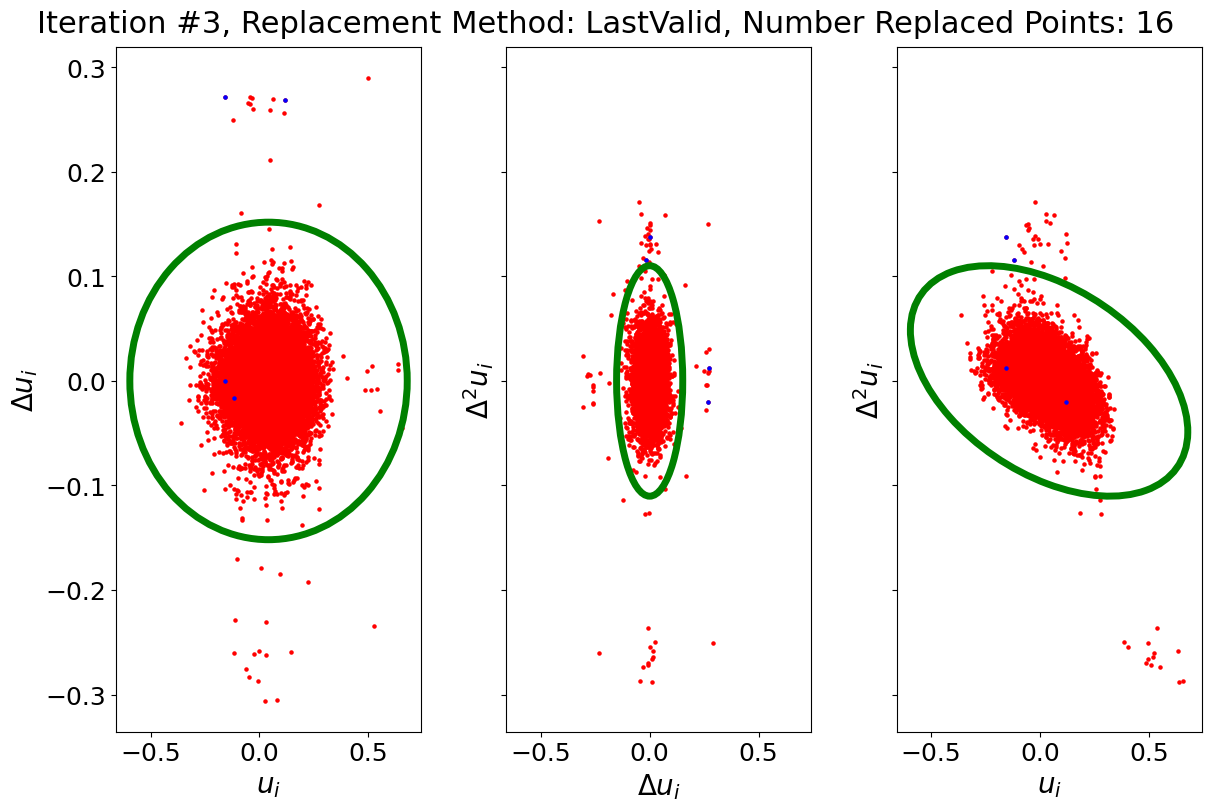

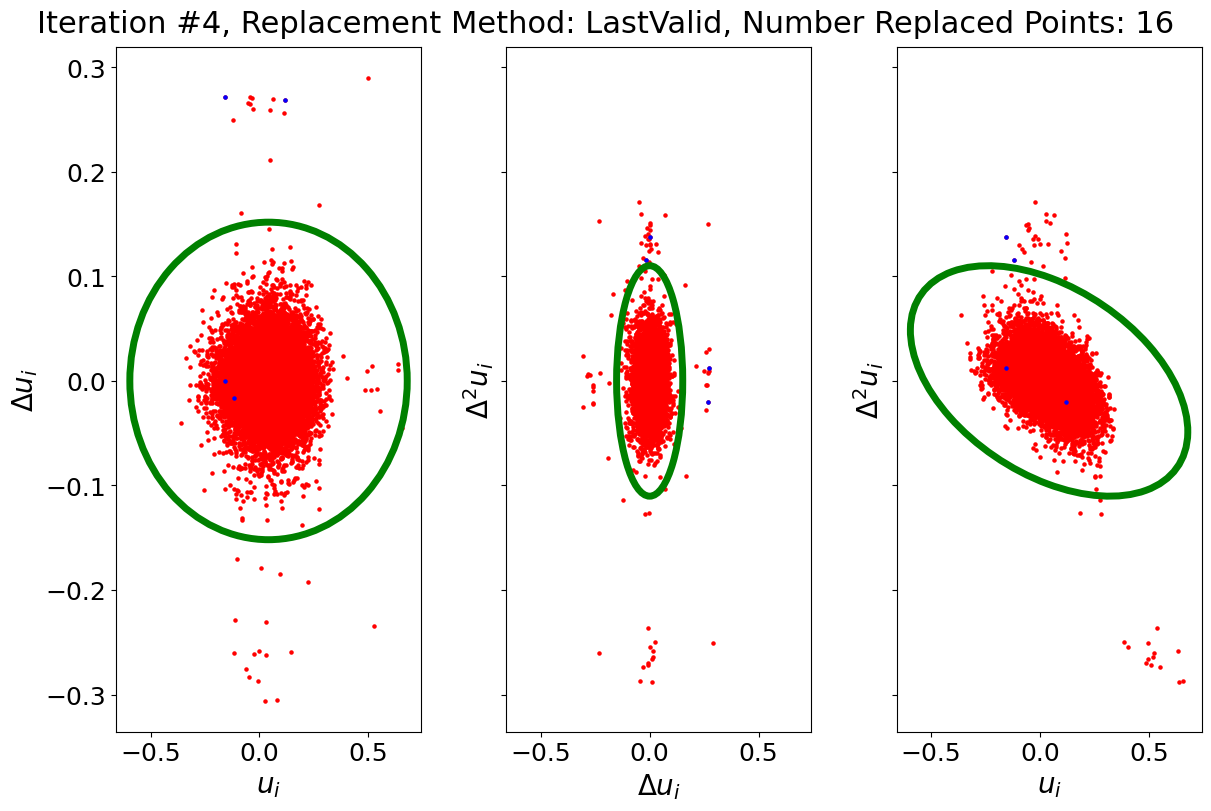

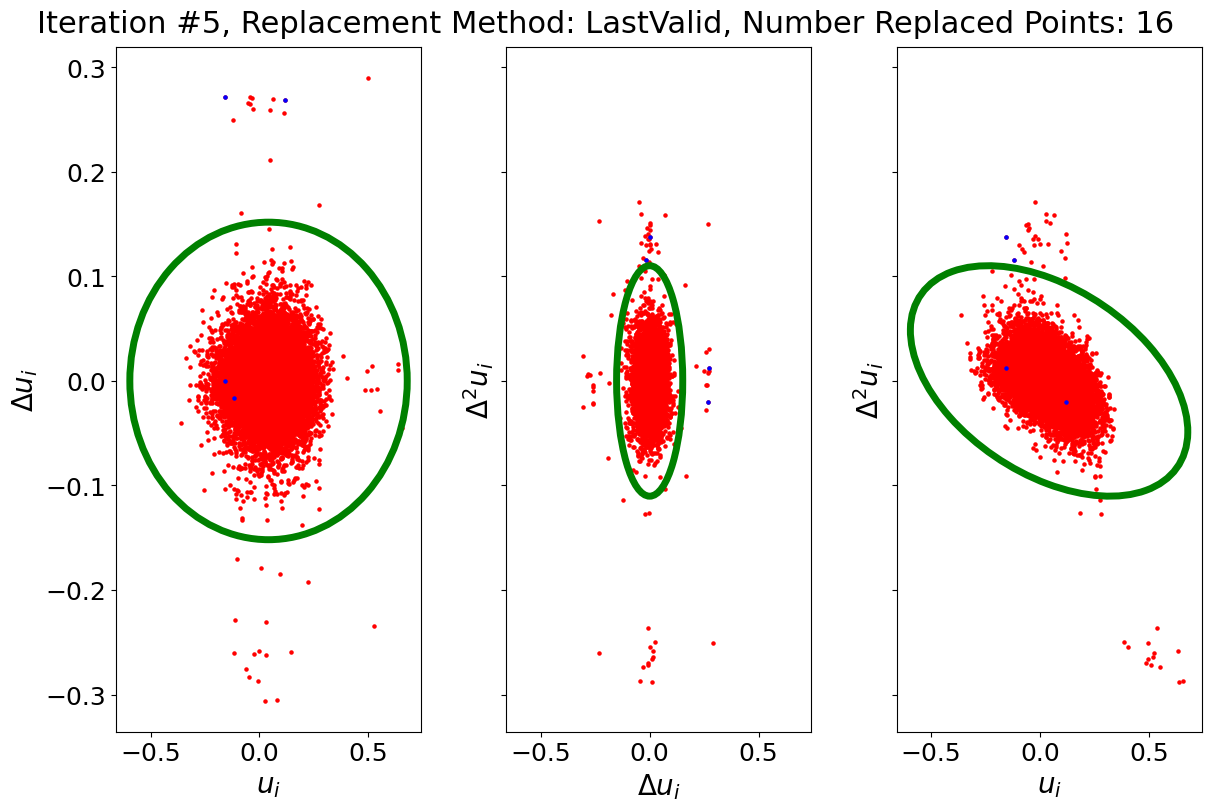

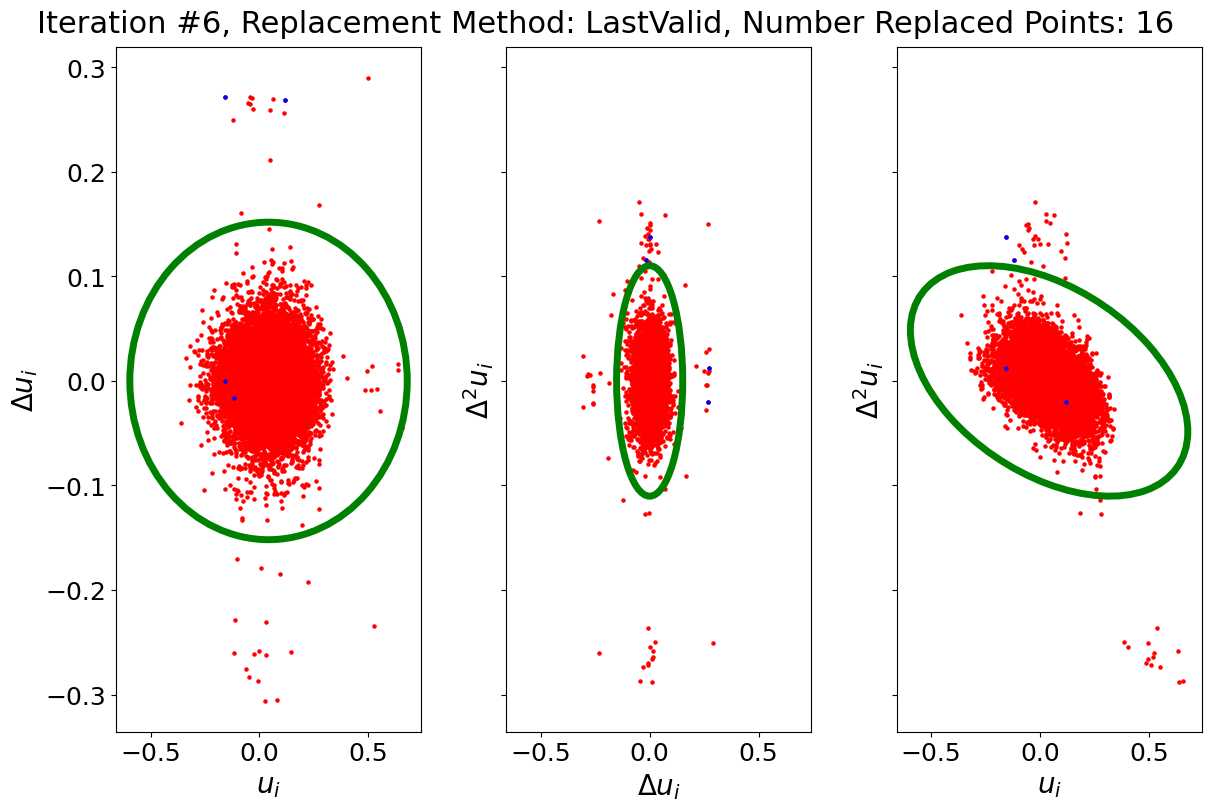

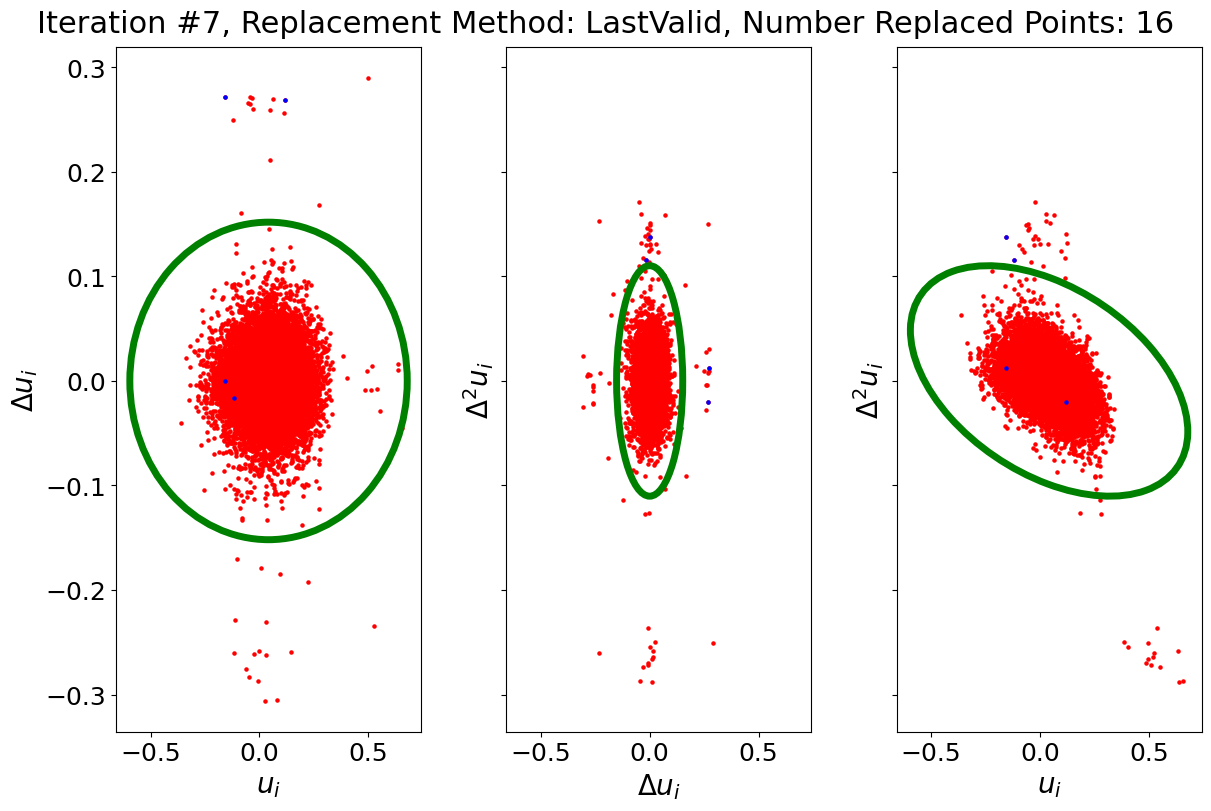

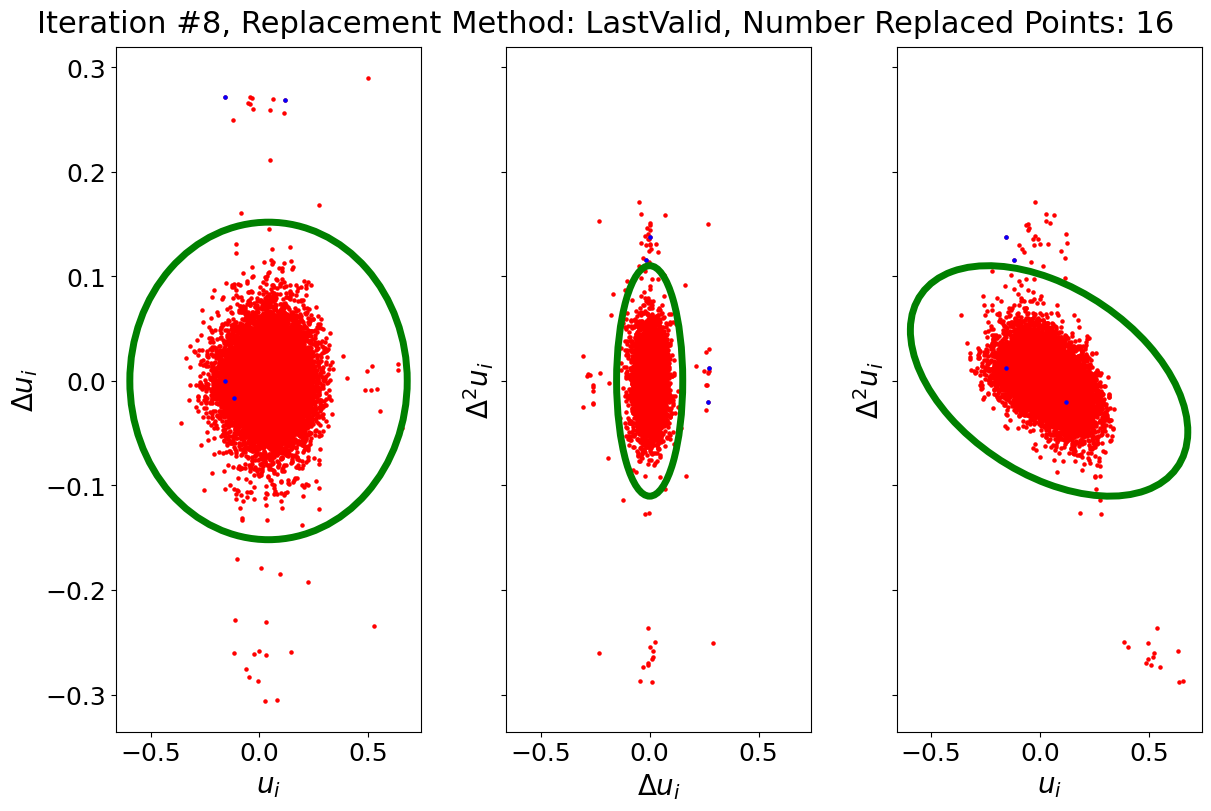

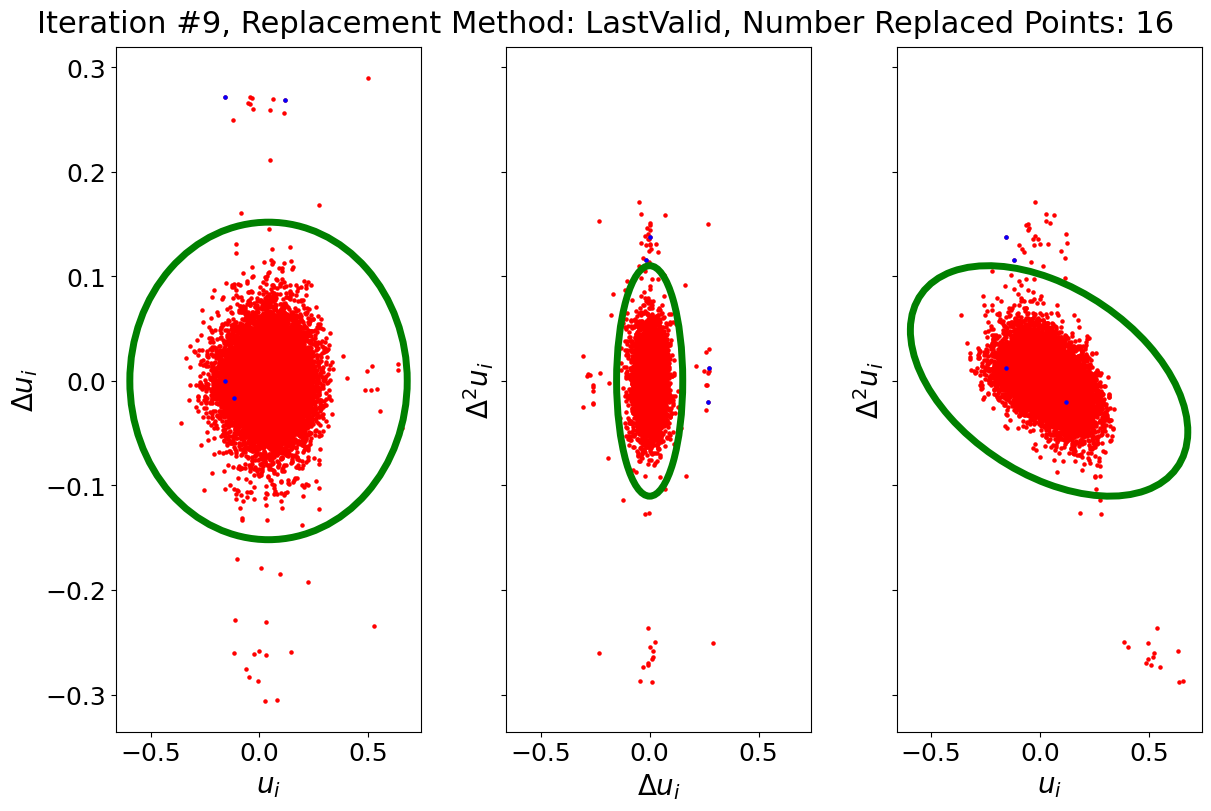

In [25]:
#point.Phase_Space_Thresholding_SingleComponent(point.Vel[0], showPhaseSpace=True, replacementMethod = "LastValid")
point.mPST(maxNumIterations=10, showPhaseSpace=True, replacementmethod = "LastValid")                     